In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pycurrents.data import modes 

In [2]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx


def calc_ip_f0(lat):
    """ Calculates inertial period and f0 for given latitude in degrees"""
    omega = 7.2921e-5
    f0 = 2 * omega * np.sin(np.deg2rad(lat))
    ip = 2 * np.pi / np.abs(f0) / 3600 / 24
    return ip, f0




In [3]:
zmax = 4000e0
dz = 1e0
zi = np.arange(0, zmax + dz, dz)
N0 = 5.23e-3
b = 1300
Nprof = N0 * np.exp(-zi/b)
zi = -1 * zi

NameError: name 'cor' is not defined

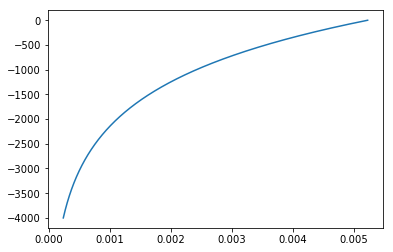

<Figure size 432x288 with 0 Axes>

In [4]:
plt.figure()
plt.plot(Nprof, zi)

plt.figure()
plt.plot(Nprof/cor, zi)

In [4]:
strat_data = np.load("stratification_means_ship.npz")

Nobs_smo_north = strat_data['Nobs_smo_north']
# Nobs_smo_north_summer = strat_data['Nobs_smo_north_summer']
# Nobs_smo_north_winter = strat_data['Nobs_smo_north_winter']

# Nobs_smo_south = strat_data['Nobs_smo_south']
# Nobs_smo_south_summer = strat_data['Nobs_smo_south_summer']
# Nobs_smo_south_winter = strat_data['Nobs_smo_south_winter']

# Nobs_smo_setp = strat_data['Nobs_smo_setp']
# Nobs_smo_setp_summer = strat_data['Nobs_smo_setp_summer']
# Nobs_smo_setp_winter = strat_data['Nobs_smo_setp_winter']

z_obs = strat_data['std_z']

(-400, 5)

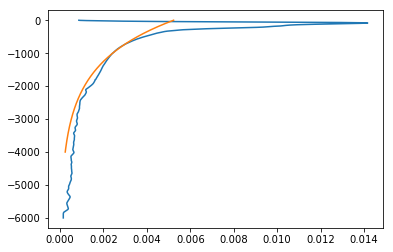

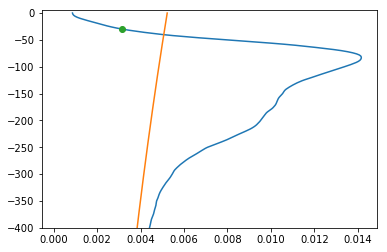

In [5]:
plt.figure()
plt.plot(Nobs_smo_north, -z_obs)
plt.plot(Nprof, zi)

plt.figure()
plt.plot(Nobs_smo_north, -z_obs)
plt.plot(Nprof, zi)
plt.plot(Nobs_smo_north[find_nearest(z_obs, 30)[1]], -30, 'o')
plt.ylim([-400, 5])

In [6]:
print(Nobs_smo_north[find_nearest(z_obs, 30)[1]])
print(max(Nobs_smo_north), z_obs[find_nearest(Nobs_smo_north, max(Nobs_smo_north))[1]])

0.00317025803197705
0.014165071024967894 82.0


## Hydrostatic (normal) vertical modes for GM idealized

In [839]:
outs_gm = modes.modes(zi, Nprof**2, nmodes=50)

In [14]:
kh0 = 2 * np.pi * np.logspace(-6, -1, 500)[:, np.newaxis]

In [10]:
ip, cor = calc_ip_f0(30.)

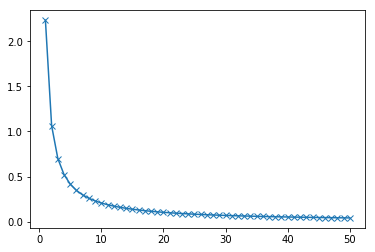

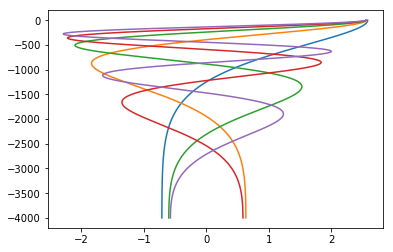

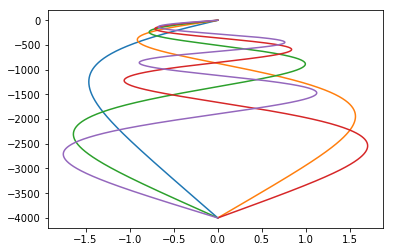

In [840]:
plt.figure()
plt.plot(outs_gm.n, outs_gm.c, '-x')

plt.figure()
plt.plot(outs_gm.u[:, :5], zi)

plt.figure()
plt.plot(outs_gm.w[:, :5], zi)

In [843]:
om2_m_f2_gm = kh0**2 * outs_gm.c[np.newaxis]**2

In [844]:
omega_gm = np.sqrt(cor**2 + om2_m_f2_gm)

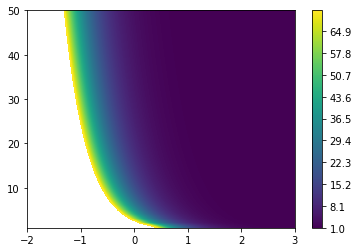

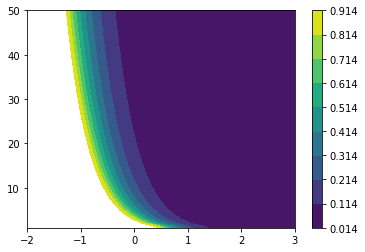

In [847]:
plt.figure()
plt.contourf(np.log10(2*np.pi/kh0[:, 0]/1e3), outs_gm.n, omega_gm.T / cor, levels=np.arange(1., N0/cor, 1e-1))
plt.colorbar()

plt.figure()
plt.contourf(np.log10(2*np.pi/kh0[:, 0]/1e3), outs_gm.n, omega_gm.T / N0, levels=np.arange(cor/N0, 1., 1e-1))
plt.colorbar()

In [7]:
Nref = N0
qsi = np.cumsum(Nprof * dz) / Nref

1.005769230769231 1247.7492190993132


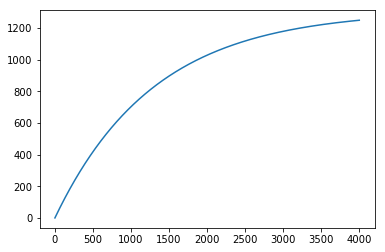

In [848]:
plt.figure()
plt.plot(qsi)
print(qsi[0], max(qsi))

In [98]:
print(N0/cor)

71.3100478600129


In [849]:
nonhydromask = omega_gm > N0

In [850]:
js = outs_gm.n

In [858]:
D_omega_v2 = js * np.pi * outs_gm.c / Nref

In [854]:
D_omega = np.asarray([qsi[find_nearest(Nprof, om)[1]] for om in omega_gm.ravel()]).reshape(omega_gm.shape)

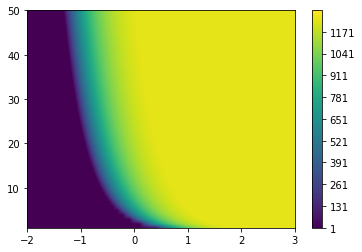

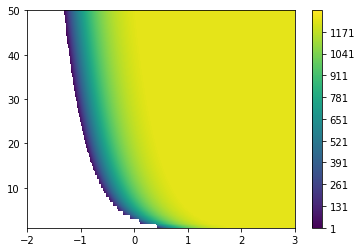

In [856]:
plt.figure()
plt.contourf(np.log10(2*np.pi/kh0[:, 0]/1e3), outs_gm.n, D_omega.T, levels=np.arange(1., 1300,))
plt.colorbar()

plt.figure()
plt.contourf(np.log10(2*np.pi/kh0[:, 0]/1e3), outs_gm.n, np.ma.masked_where(nonhydromask, D_omega).T, levels=np.arange(1., 1300,))
plt.colorbar()

[[870.72248492]
 [660.14490927]
 [250.49415422]
 [ 62.7473213 ]
 [ 15.71783718]]


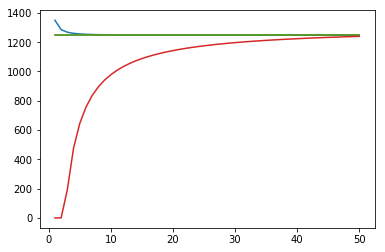

In [860]:
plt.figure()
plt.plot(js, D_omega_v2)
# plt.plot(js, np.ma.masked_where(nonhydromask, D_omega).T);
plt.plot(js, D_omega[10]);
# plt.plot(js, D_omega[30]);
plt.plot(js, D_omega[100]);
# plt.plot(js, D_omega[200]);
plt.plot(js, D_omega[300]);
print(2*np.pi/kh[[10, 30, 100, 200, 300]]/1e3)

In [ ]:
Psi_j = outs.w[:]
Psi_prime_j = outs.u[:]

In [186]:
psi_j = np.sqrt(2*om2_m_f2[None]/(Nprof[:, None, None]*Nref)) * np.sin(js[None, None]*np.pi*qsi[:, None, None]/D_omega[None])

In [368]:
psi_j2 = np.sqrt(2*om2_m_f2[None]/(Nprof[:, None, None]*Nref)) * np.sin(js[None, None]*np.pi*qsi[:, None, None]/D_omega_v2[None, None])

In [207]:
print(find_nearest(omega[:, 0]*3600/(2*np.pi), 1.1))
print(find_nearest(omega[:, 3]*3600/(2*np.pi), 1.1))

print(find_nearest(omega[:, 0]*3600/(2*np.pi), 1.1))
print(find_nearest(omega[:, 3]*3600/(2*np.pi), 1.1))

(1.0901164098088953, 213)
(1.0887978122617548, 276)


In [216]:
print(1.1/3600*2*np.pi, omega[213, 0])

0.0019198621771937627 0.0019026120581185032


In [237]:
1.1/3600*2*np.pi

0.0019198621771937627

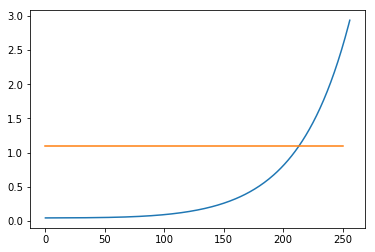

In [203]:
plt.figure()
plt.plot(np.ma.masked_where(nonhydromask, omega)[:, 0]*3600/(2*np.pi))
plt.plot([0, 250], [1.1, 1.1])

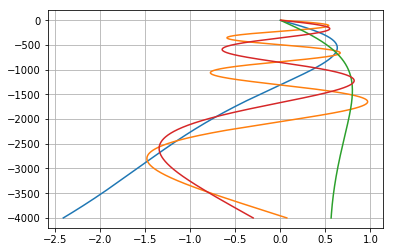

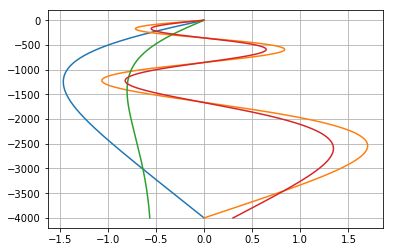

In [374]:
plt.figure()
plt.plot(psi_j[:, 213, 0], zi)
plt.plot(psi_j[:, 276, 3], zi)
plt.grid()

plt.plot(psi_j2[:, 213, 0], zi)
plt.plot(psi_j2[:, 276, 3], zi)

# plt.figure()
# plt.plot(psi_j[:, 213, 0], zi)
# plt.plot(psi_j[:, 276, 3], zi)

plt.figure()
plt.plot(outs.w[:, 0], zi)
plt.plot(outs.w[:, 3], zi)
plt.plot(-psi_j2[:, 213, 0], zi)
plt.plot(-psi_j2[:, 276, 3], zi)

plt.grid()

In [248]:
om1 = 1.1/3600*2*np.pi
Dom = qsi[find_nearest(Nprof, om1)[1]]
psi_j1 = np.sqrt(2*(om1**2 - cor**2)/(Nprof[:, None]*Nref)) * np.sin(js[None]*np.pi*qsi[:, None]/Dom)

In [249]:
find_nearest(Nprof, om1)

(0.001919574574619473, 1303)

In [250]:
qsi1 = np.cumsum(Nprof * dz) / Nref

823.5426486594165


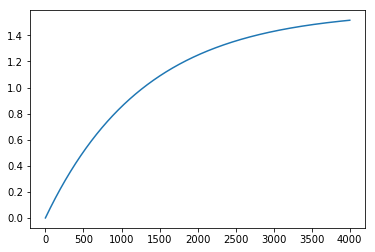

In [273]:
plt.figure()
plt.plot(qsi1[:, None]/Dom)
print(Dom)

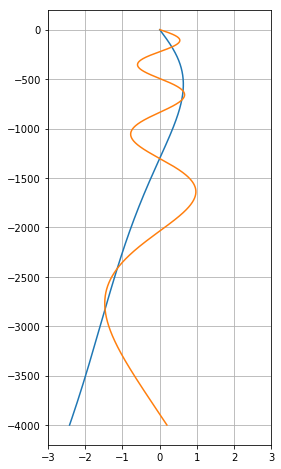

In [261]:
plt.figure(figsize=(4, 8))
plt.plot(psi_j1[:, 0], zi)
plt.plot(psi_j1[:, 3], zi)
# plt.plot(-psi_j1[:, 3], zi)
plt.xlim([-3, 3])
plt.grid()
# plt.figure()
# plt.plot(outs.w[:, 0], zi)
# plt.plot(outs.w[:, 3], zi)

In [27]:
Q_om_w = np.sum((outs.w[..., np.newaxis]**2) * (Nprof[:, np.newaxis, np.newaxis]**2) / (om2_m_f2.T[np.newaxis]) * dz, axis=0)

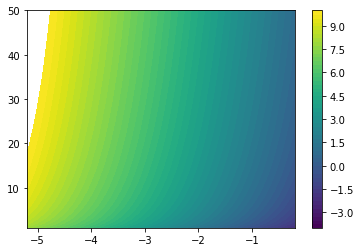

In [42]:
plt.figure()
plt.contourf(np.log10(kh[:, 0]), outs.n, np.log10(Q_om_w), levels=np.arange(-4, 10.25, .25))
plt.colorbar()

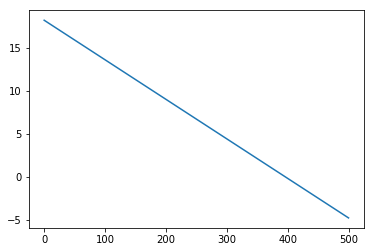

In [46]:
plt.figure()
plt.plot(np.log(Q_om_w[0]))

In [50]:
(kh[10]**2) * (outs.c[0]**2)

array([3.08976746e-10])

In [67]:
Nprof.max()**2 / (kh[30]**2 * outs.c[0]**2)

array([34775.97296041])

In [66]:
find_nearest(2*np.pi/kh/1e3, 500e0)

(array([500.49391027]), 30)

In [241]:
Nprof[125]

0.004750535896140762

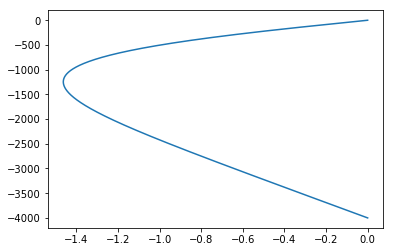

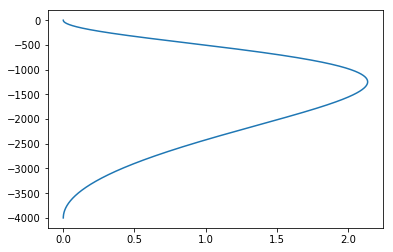

In [137]:
plt.figure()
plt.plot(outs.w[:, 0], zi)

plt.figure()
plt.plot(outs.w[:, 0]**2, zi)

In [139]:
print(np.sum(outs.w[:, 10]**2), np.sum(outs.w[:, 10]))


4000.9999999999877 -1327.25940777927


In [135]:
Nprof.max()**2 / (kh[30]**2 * outs.c[0]**2)

array([34775.97296041])

In [302]:
j_star = 3.
jsum = (-1 + 3 * np.pi / np.tanh(3 * np.pi)) / (2 * j_star**2)
H = (js**2 + j_star**2)**-1 / jsum

In [291]:
FA2 = 2 - (np.pi * j_star * (np.cosh(np.pi * j_star) -
                             np.cosh(2*np.pi * j_star * (qsi1 / Dom - .5))
                            ) / (np.pi * j_star * np.cosh(np.pi * j_star) - np.sinh(np.pi * j_star))
          ) 

In [348]:
# Vert_cos_term = np.sum(np.cos(js[None] * np.pi * qsi1[:, None] / Dom)**2, axis=-1)
# Vert_sin_term = np.sum(np.sin(js[None] * np.pi * qsi1[:, None] / Dom)**2, axis=-1)

Vert_cos_term = np.cos(js[None, None] * np.pi * qsi[:, None, None] / D_omega[None])**2
Vert_sin_term = np.sin(js[None, None] * np.pi * qsi[:, None, None] / D_omega[None])**2

Freq_term_KE = (omega**2 + cor**2) / omega**2
Freq_term_PE = (omega**2 - cor**2) / omega**2

In [310]:
Vert_term_KE = H * Freq_term_KE * Vert_cos_term

In [354]:
Vert_term_PE = H * Freq_term_PE * Vert_sin_term

In [351]:
print(Vert_term_KE.shape, Vert_term_PE.shape)
print(qsi.shape, D_omega.shape, Freq_term_KE.shape)

(4001, 500, 50) (4001, 500, 50)
(4001,) (500, 50) (500, 50)


In [328]:
2*np.pi/kh[200]/1e3

array([9.90813657])

## Prescribing frequencies then using Levine eq 30

Frequencies $\omega$ are specified and are NOT the modal frequencies as above (which may explain why there is some mismatch).

In [13]:
num_modes = 50
j_star = 3.
jsum = (-1 + j_star * np.pi / np.tanh(j_star * np.pi)) / (2 * j_star**2)
f0 = calc_ip_f0(30.)[1]
Eref = .92e-3

js = np.arange(1, num_modes + 1)

M2 = 12.42 * 3600.
omg_s2 = 2. * np.pi / M2

sig = np.logspace(np.log10(f0), np.log10(N0), 1000)[1:]

B = 2 / np.pi * f0 / sig / np.sqrt(sig**2 - f0**2)

om_func = np.ones((sig.shape))
oidx = np.logical_and(sig <= omg_s2, sig > f0)
om_func[oidx] = (1. + f0 / omg_s2)*((sig[oidx] / omg_s2)**3
                                    )/(((sig[oidx]/omg_s2)**2.5) + (f0/omg_s2))

C = np.arccos(f0 / Nref) - np.arccos(f0 / omg_s2)

Bhat = .5 * np.pi * B / C * om_func

H = (js**2 + j_star**2)**-1 / jsum

NameError: name 'Nref' is not defined

In [13]:
Freq_term_KE = (sig**2 + f0**2) / (sig**2)
Freq_term_PE = (sig**2 - f0**2) / (sig**2)

In [14]:
qsi = np.cumsum(Nprof * dz) / Nref

In [15]:
D_omega = np.asarray([qsi[find_nearest(Nprof, om)[1]] for om in sig])

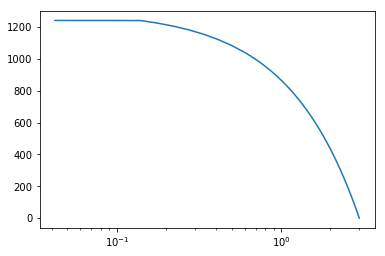

In [16]:
plt.figure()
plt.semilogx(sig*3600/2/np.pi, D_omega)

In [18]:
qsi_over_D = qsi / D_omega[:, None]
qsi_over_D[qsi_over_D > 1.] = np.nan

In [1177]:
print(Nprof.shape, Bhat.shape, H.shape, D_omega.shape, js.shape, sig.shape, qsi_over_D.shape)

(4001,) (999,) (50,) (999,) (50,) (999,) (999, 4001)


In [24]:
Vert_cos_term = np.cos(js[None, None] * np.pi * qsi_over_D[..., None])**2
Vert_sin_term = np.sin(js[None, None] * np.pi * qsi_over_D[..., None])**2

Vert_term_KE = H[None, None] * Freq_term_KE[:, None, None] * Vert_cos_term
Vert_term_PE = H[None, None] * Freq_term_PE[:, None, None] * Vert_sin_term

In [1195]:
KE_star = Eref * Nprof[None] / Nref * Bhat[:, None] * np.nansum(Vert_term_KE, axis=-1)
PE_star = Eref * Nprof[None] / Nref * Bhat[:, None] * np.nansum(Vert_term_PE, axis=-1)

In [1209]:
Gamma_star = Eref * Nprof[None] / Nref * Bhat[:, None] * np.nansum(H[None, None] * (Freq_term_KE[:, None, None]*np.cos(js[None, None]*np.pi*qsi_over_D[..., None])**2 +
                                                     Freq_term_PE[:, None, None]*np.sin(js[None, None]*np.pi*qsi_over_D[..., None])**2), axis=-1)

In [1210]:
KE_star = Eref * Nprof[None] / Nref * Bhat[:, None] * Freq_term_KE[:, None,] * np.nansum(H[None, None] * np.cos(js[None, None]*np.pi*qsi_over_D[..., None])**2, axis=-1)




In [1211]:
PE_star = Eref * Nprof[None] / Nref * Bhat[:, None] * Freq_term_PE[:, None] * np.nansum(H[None, None] * np.sin(js[None, None]*np.pi*qsi_over_D[..., None])**2, axis=-1)



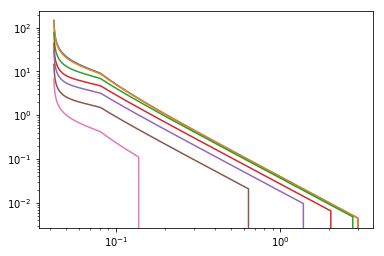

In [1212]:
plt.figure()
plt.loglog(sig*3600/2/np.pi, Gamma_star[:, 1])
plt.loglog(sig*3600/2/np.pi, Gamma_star[:, 10])
plt.loglog(sig*3600/2/np.pi, Gamma_star[:, 100])
plt.loglog(sig*3600/2/np.pi, Gamma_star[:, 500])
plt.loglog(sig*3600/2/np.pi, Gamma_star[:, 1000])
plt.loglog(sig*3600/2/np.pi, Gamma_star[:, 2000])
plt.loglog(sig*3600/2/np.pi, Gamma_star[:, 4000])

(0.0001, 200.0)

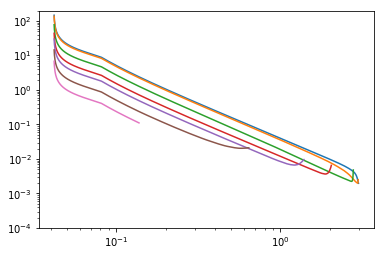

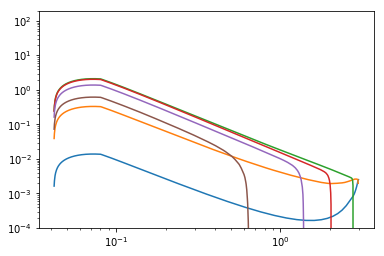

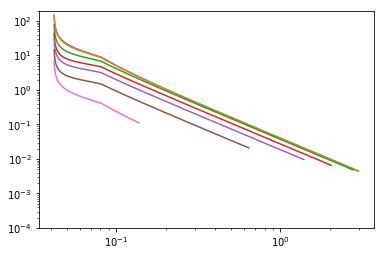

In [1200]:
plt.figure()
plt.loglog(sig*3600/2/np.pi, KE_star[:, 1])
plt.loglog(sig*3600/2/np.pi, KE_star[:, 10])
plt.loglog(sig*3600/2/np.pi, KE_star[:, 100])
plt.loglog(sig*3600/2/np.pi, KE_star[:, 500])
plt.loglog(sig*3600/2/np.pi, KE_star[:, 1000])
plt.loglog(sig*3600/2/np.pi, KE_star[:, 2000])
plt.loglog(sig*3600/2/np.pi, KE_star[:, 4000])
plt.ylim([1e-4, 2e2])

plt.figure()
plt.loglog(sig*3600/2/np.pi, PE_star[:, 1])
plt.loglog(sig*3600/2/np.pi, PE_star[:, 10])
plt.loglog(sig*3600/2/np.pi, PE_star[:, 100])
plt.loglog(sig*3600/2/np.pi, PE_star[:, 500])
plt.loglog(sig*3600/2/np.pi, PE_star[:, 1000])
plt.loglog(sig*3600/2/np.pi, PE_star[:, 2000])
plt.loglog(sig*3600/2/np.pi, PE_star[:, 4000])
plt.ylim([1e-4, 2e2])

plt.figure()
plt.loglog(sig*3600/2/np.pi, PE_star[:, 1] + KE_star[:, 1])
plt.loglog(sig*3600/2/np.pi, PE_star[:, 10] + KE_star[:, 10])
plt.loglog(sig*3600/2/np.pi, PE_star[:, 100] + KE_star[:, 100])
plt.loglog(sig*3600/2/np.pi, PE_star[:, 500] + KE_star[:, 500])
plt.loglog(sig*3600/2/np.pi, PE_star[:, 1000] + KE_star[:, 1000])
plt.loglog(sig*3600/2/np.pi, PE_star[:, 2000] + KE_star[:, 2000])
plt.loglog(sig*3600/2/np.pi, PE_star[:, 4000] + KE_star[:, 4000])
plt.ylim([1e-4, 2e2])



### Now we try with the F function from appendix A

In [25]:
FA2 = 2 - (np.pi * j_star * (np.cosh(np.pi * j_star) -
                             np.cosh(2*np.pi * j_star * (qsi_over_D - .5))
                            ) / (np.pi * j_star * np.cosh(np.pi * j_star) - np.sinh(np.pi * j_star))
          ) 

In [20]:
KE_ms = .5 * Eref * Nprof[None] / Nref * Bhat[:, None] * Freq_term_KE[:, None,] * FA2

In [21]:
PE_ms = Eref * Nprof[None] / Nref * Bhat[:, None] * Freq_term_PE[:, None,] * (2 - FA2)

(0.0001, 200.0)

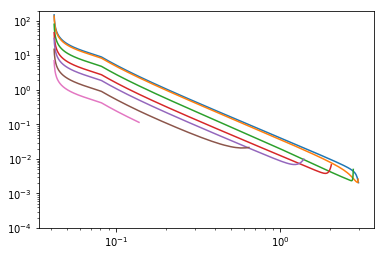

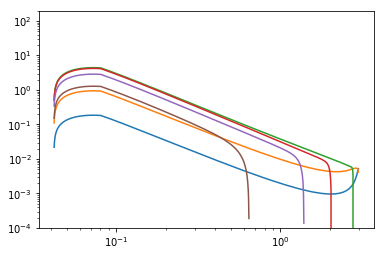

In [22]:
plt.figure()
plt.loglog(sig*3600/2/np.pi, KE_ms[:, 1])
plt.loglog(sig*3600/2/np.pi, KE_ms[:, 10])
plt.loglog(sig*3600/2/np.pi, KE_ms[:, 100])
plt.loglog(sig*3600/2/np.pi, KE_ms[:, 500])
plt.loglog(sig*3600/2/np.pi, KE_ms[:, 1000])
plt.loglog(sig*3600/2/np.pi, KE_ms[:, 2000])
plt.loglog(sig*3600/2/np.pi, KE_ms[:, 4000])
plt.ylim([1e-4, 2e2])

plt.figure()
plt.loglog(sig*3600/2/np.pi, PE_ms[:, 1])
plt.loglog(sig*3600/2/np.pi, PE_ms[:, 10])
plt.loglog(sig*3600/2/np.pi, PE_ms[:, 100])
plt.loglog(sig*3600/2/np.pi, PE_ms[:, 500])
plt.loglog(sig*3600/2/np.pi, PE_ms[:, 1000])
plt.loglog(sig*3600/2/np.pi, PE_ms[:, 2000])
plt.loglog(sig*3600/2/np.pi, PE_ms[:, 4000])
plt.ylim([1e-4, 2e2])

Consistent with the above; although there seems to be a factor wrong - notably in the PE

So testing the number of modes in the first calculation may be a good idea? The test indicates it didn't resolve using a larger number of modes.

(0, 2)

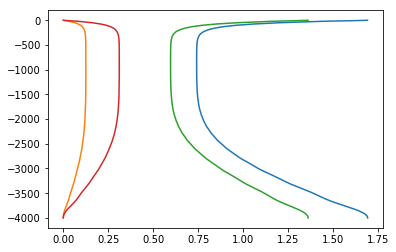

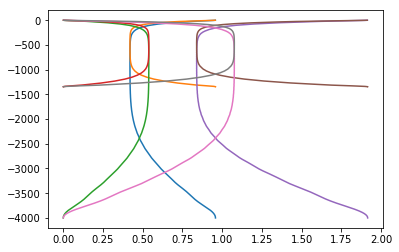

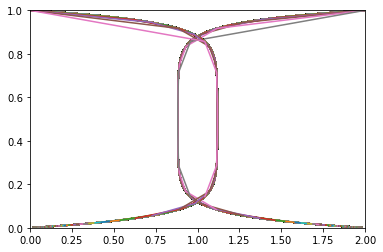

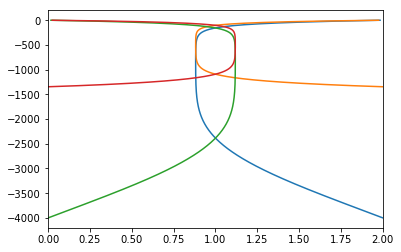

In [26]:
plt.figure()
plt.plot(Vert_term_KE[30].sum(axis=-1), zi)
plt.plot(Vert_term_PE[30].sum(axis=-1), zi)
plt.plot(Vert_term_KE[100].sum(axis=-1), zi)
plt.plot(Vert_term_PE[100].sum(axis=-1), zi)

plt.figure()
plt.plot(np.sum(H[None, None]*Vert_cos_term, axis=-1)[[150, 756]].T, zi)
plt.plot(np.sum(H[None, None]*Vert_sin_term, axis=-1)[[150, 756]].T, zi)
plt.plot(2*np.sum(H[None, None]*Vert_cos_term, axis=-1)[[150, 756]].T, zi)
plt.plot(2*np.sum(H[None, None]*Vert_sin_term, axis=-1)[[150, 756]].T, zi)

plt.figure()
plt.plot(FA2.T, qsi_over_D.T)
plt.plot(2 - FA2.T, qsi_over_D.T)
plt.ylim([0, 1])
plt.xlim([0, 2])

plt.figure()
plt.plot(FA2[150], zi)
plt.plot(FA2[756], zi)
plt.plot(2 - FA2[150], zi)
plt.plot(2 - FA2[756], zi)
# plt.ylim([0, 1])
plt.xlim([0, 2])

Based on the test above; it was just a factor of 2

(0.0001, 200.0)

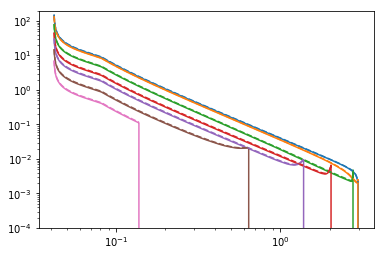

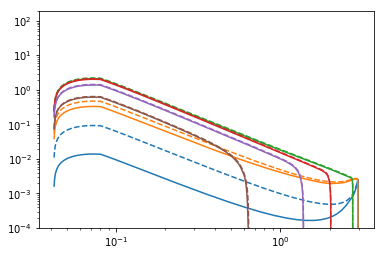

In [1222]:
plt.figure()
plt.loglog(sig*3600/2/np.pi, KE_star[:, 1])
plt.loglog(sig*3600/2/np.pi, KE_star[:, 10])
plt.loglog(sig*3600/2/np.pi, KE_star[:, 100])
plt.loglog(sig*3600/2/np.pi, KE_star[:, 500])
plt.loglog(sig*3600/2/np.pi, KE_star[:, 1000])
plt.loglog(sig*3600/2/np.pi, KE_star[:, 2000])
plt.loglog(sig*3600/2/np.pi, KE_star[:, 4000])
plt.loglog(sig*3600/2/np.pi, KE_ms[:, 1], ls='--', color='C0')
plt.loglog(sig*3600/2/np.pi, KE_ms[:, 10], ls='--', color='C1')
plt.loglog(sig*3600/2/np.pi, KE_ms[:, 100], ls='--', color='C2')
plt.loglog(sig*3600/2/np.pi, KE_ms[:, 500], ls='--', color='C3')
plt.loglog(sig*3600/2/np.pi, KE_ms[:, 1000], ls='--', color='C4')
plt.loglog(sig*3600/2/np.pi, KE_ms[:, 2000], ls='--', color='C5')
plt.loglog(sig*3600/2/np.pi, KE_ms[:, 4000], ls='--', color='C6')
plt.ylim([1e-4, 2e2])

fac = .5
plt.figure()
plt.loglog(sig*3600/2/np.pi, PE_star[:, 1])
plt.loglog(sig*3600/2/np.pi, fac*PE_ms[:, 1], ls='--', color='C0')
plt.loglog(sig*3600/2/np.pi, PE_star[:, 10])
plt.loglog(sig*3600/2/np.pi, fac*PE_ms[:, 10], ls='--', color='C1')
plt.loglog(sig*3600/2/np.pi, PE_star[:, 100])
plt.loglog(sig*3600/2/np.pi, fac*PE_ms[:, 100], ls='--', color='C2')
plt.loglog(sig*3600/2/np.pi, PE_star[:, 500])
plt.loglog(sig*3600/2/np.pi, fac*PE_ms[:, 500], ls='--', color='C3')
plt.loglog(sig*3600/2/np.pi, PE_star[:, 1000])
plt.loglog(sig*3600/2/np.pi, fac*PE_ms[:, 1000], ls='--', color='C4')
plt.loglog(sig*3600/2/np.pi, PE_star[:, 2000])
plt.loglog(sig*3600/2/np.pi, fac*PE_ms[:, 2000], ls='--', color='C5')
plt.loglog(sig*3600/2/np.pi, PE_star[:, 4000])
plt.loglog(sig*3600/2/np.pi, fac*PE_ms[:, 4000], ls='--', color='C6')
plt.ylim([1e-4, 2e2])

This shows that the Appendix approximate vertical function seems to perform poorer than eq 30 at the proximity of the boundary or the turning point.

### Comparison against the GM

In [1101]:
def calc_gm_freq_specs(latm=30., N0=5.2e-3, b=1.3e3, Nd=None):
    '''at the top where N(z)=N0 and as a function of freq'''

    if Nd is None:
        Nd = N0
    freqs = np.fft.fftfreq(30 * 24 * 6, d=1./6.)  # 3 cph to 30 day period motions
    freqs = np.fft.fftshift(freqs)
    freqs = freqs[:len(freqs)//2]
    freqs = np.abs(freqs)
    sig = freqs * 2 * np.pi / 3600.

    jsum = (-1 + 3 * np.pi / np.tanh(3 * np.pi)) / 18
    j_star = 3.
    E = 6.3e-5

    f0 = calc_ip_f0(latm)[1]
    grav = 9.81

    m = np.arange(1, 10000)

    B = 2 / np.pi * f0 / sig / np.sqrt(sig**2 - f0**2)  # eq for freq dep
    H = (m**2 + j_star**2)**-1 / jsum  # eq for vertical wavenumber depence

    Freq_term_KE = (sig**2 + f0**2) / sig**2
    Freq_term_PE = (sig**2 - f0**2) / sig**2
    
    Gamma = np.sum(E * b**2 * N0 * Nd * B[:, np.newaxis] * H[np.newaxis], axis=-1)
    KE = np.sum(.5 * E * (b**2)* N0*Nd * B[:, np.newaxis] * Freq_term_KE[:, np.newaxis] * H[np.newaxis], axis=-1)  # KE
    Zeta = np.sum(E * (b**2)* N0*Nd * B[:, np.newaxis] * Freq_term_PE[:, np.newaxis] * H[np.newaxis], axis=-1)
    SSH = np.sum(E * (b**4) * (N0**5)/Nd/((grav**2)*(np.pi**2))* Freq_term_PE[:, np.newaxis] * B[:, np.newaxis]
                 * H[np.newaxis] / (m[np.newaxis]**2), axis=-1)

    return freqs, KE, Zeta, Gamma, SSH




/home/smullersoares/anaconda3/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


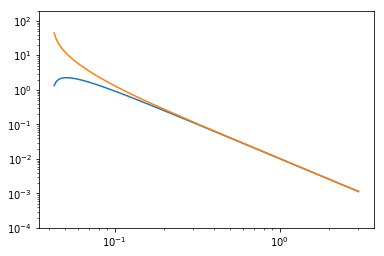

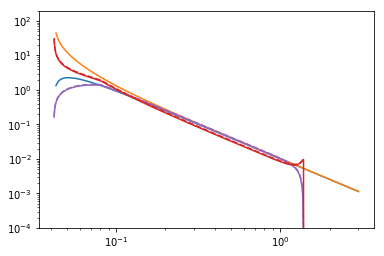

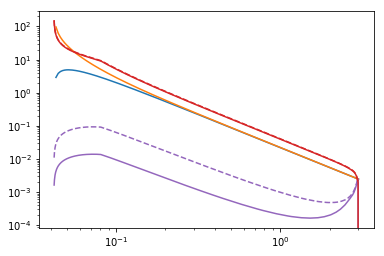

In [1223]:
plt.figure()
freqs, KE_gm0, Zeta_gm0, Gamma_gm0, SSH_gm0 = calc_gm_freq_specs(latm=30., N0=N0, b=1.3e3, Nd=Nprof[1000])
plt.loglog(freqs, fac*Zeta_gm0)
plt.loglog(freqs, KE_gm0)
plt.ylim([1e-4, 2e2])

plt.figure()
freqs, KE_gm0, Zeta_gm0, Gamma_gm0, SSH_gm0 = calc_gm_freq_specs(latm=30., N0=N0, b=1.3e3, Nd=Nprof[1000])
plt.loglog(freqs, fac*Zeta_gm0)
plt.loglog(freqs, KE_gm0)
plt.ylim([1e-4, 2e2])
plt.loglog(sig*3600/2/np.pi, PE_star[:, 1000], color='C4')
plt.loglog(sig*3600/2/np.pi, fac*PE_ms[:, 1000], ls='--', color='C4')
plt.loglog(sig*3600/2/np.pi, KE_star[:, 1000], color='C3')
plt.loglog(sig*3600/2/np.pi, KE_ms[:, 1000], ls='--', color='C3')


# plt.loglog(sig*3600/2/np.pi, PE_star[:, 10])
# plt.loglog(sig*3600/2/np.pi, fac*PE_ms[:, 10], ls='--', color='C1')
# plt.loglog(sig*3600/2/np.pi, PE_star[:, 100])
# plt.loglog(sig*3600/2/np.pi, fac*PE_ms[:, 100], ls='--', color='C2')
# plt.loglog(sig*3600/2/np.pi, PE_star[:, 500])
# plt.loglog(sig*3600/2/np.pi, fac*PE_ms[:, 500], ls='--', color='C3')
# plt.loglog(sig*3600/2/np.pi, PE_star[:, 2000])
# plt.loglog(sig*3600/2/np.pi, fac*PE_ms[:, 2000], ls='--', color='C5')
# plt.loglog(sig*3600/2/np.pi, PE_star[:, 4000])
# plt.loglog(sig*3600/2/np.pi, fac*PE_ms[:, 4000], ls='--', color='C6')

plt.figure()
freqs, KE_gm0, Zeta_gm0, Gamma_gm0, SSH_gm0 = calc_gm_freq_specs(latm=30., N0=N0, b=1.3e3, Nd=Nprof[1])
plt.loglog(freqs, fac*Zeta_gm0)
plt.loglog(freqs, KE_gm0)

plt.loglog(sig*3600/2/np.pi, PE_star[:, 1], color='C4')
plt.loglog(sig*3600/2/np.pi, fac*PE_ms[:, 1], ls='--', color='C4')
plt.loglog(sig*3600/2/np.pi, KE_star[:, 1], color='C3')
plt.loglog(sig*3600/2/np.pi, KE_ms[:, 1], ls='--', color='C3')


/home/smullersoares/anaconda3/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


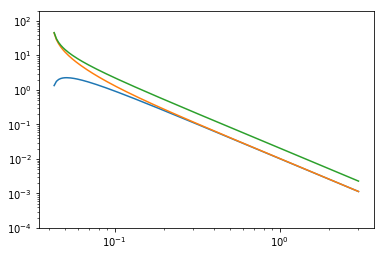

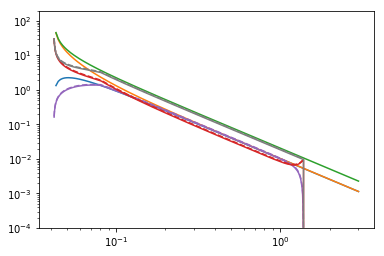

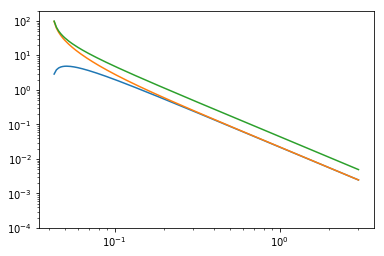

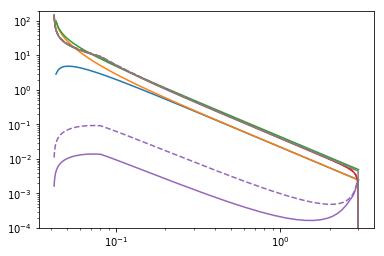

In [1224]:
plt.figure()
freqs, KE_gm0, Zeta_gm0, Gamma_gm0, SSH_gm0 = calc_gm_freq_specs(latm=30., N0=N0, b=1.3e3, Nd=Nprof[1000])
plt.loglog(freqs, fac*Zeta_gm0)
plt.loglog(freqs, KE_gm0)
plt.loglog(freqs, Gamma_gm0)
plt.ylim([1e-4, 2e2])

plt.figure()
freqs, KE_gm0, Zeta_gm0, Gamma_gm0, SSH_gm0 = calc_gm_freq_specs(latm=30., N0=N0, b=1.3e3, Nd=Nprof[1000])
plt.loglog(freqs, fac*Zeta_gm0)
plt.loglog(freqs, KE_gm0)
plt.loglog(freqs, Gamma_gm0)
plt.ylim([1e-4, 2e2])
plt.loglog(sig*3600/2/np.pi, PE_star[:, 1000], color='C4')
plt.loglog(sig*3600/2/np.pi, fac*PE_ms[:, 1000], ls='--', color='C4')
plt.loglog(sig*3600/2/np.pi, KE_star[:, 1000], color='C3')
plt.loglog(sig*3600/2/np.pi, KE_ms[:, 1000], ls='--', color='C3')
plt.loglog(sig*3600/2/np.pi, Gamma_star[:, 1000], color='C7')
plt.loglog(sig*3600/2/np.pi, KE_ms[:, 1000]+fac*PE_ms[:, 1000], ls='--', color='C7')

plt.figure()
freqs, KE_gm0, Zeta_gm0, Gamma_gm0, SSH_gm0 = calc_gm_freq_specs(latm=30., N0=N0, b=1.3e3, Nd=Nprof[1])
plt.loglog(freqs, fac*Zeta_gm0)
plt.loglog(freqs, KE_gm0)
plt.loglog(freqs, Gamma_gm0)
plt.ylim([1e-4, 2e2])

plt.figure()
freqs, KE_gm0, Zeta_gm0, Gamma_gm0, SSH_gm0 = calc_gm_freq_specs(latm=30., N0=N0, b=1.3e3, Nd=Nprof[1])
plt.loglog(freqs, fac*Zeta_gm0)
plt.loglog(freqs, KE_gm0)
plt.loglog(freqs, Gamma_gm0)
plt.ylim([1e-4, 2e2])
plt.loglog(sig*3600/2/np.pi, PE_star[:, 1], color='C4')
plt.loglog(sig*3600/2/np.pi, fac*PE_ms[:, 1], ls='--', color='C4')
plt.loglog(sig*3600/2/np.pi, KE_star[:, 1], color='C3')
plt.loglog(sig*3600/2/np.pi, KE_ms[:, 1], ls='--', color='C3')
plt.loglog(sig*3600/2/np.pi, Gamma_star[:, 1], color='C7')
plt.loglog(sig*3600/2/np.pi, KE_ms[:, 1]+fac*PE_ms[:, 1], ls='--', color='C7')

In [1167]:
# print(sig0[150]*3600/2/np.pi, sig0[765]*3600/2/np.pi)
# print(sig[75]*3600/2/np.pi, sig[tf]*3600/2/np.pi)

0.0797000771248575 1.1061786911659763
0.08009384722534932 1.1098160203886844


## Another approach with actual non-hydrostatic modes

I think this matches the original intended use. Uses equation 9 of Levine 2002.

Frequencies $\omega$ are specified and are NOT the modal frequencies as above (which may explain why there is some mismatch).

In [1057]:
# d_omegai = 1e-2 * cor
# omegai = np.arange(cor, N0 + d_omegai, d_omegai)

omegai = np.logspace(np.log10(cor), np.log10(N0), 500)

In [755]:
%%time
num_modes = 50
# psi_nh = np.empty((len(omegai), len(zi[:-1:4]), num_modes))
# psi_prime_nh = np.empty((len(omegai), len(zi[:-1:4]), num_modes))
psi_nh = []
psi_prime_nh = []
# cs = np.empty((len(omegai), num_modes))
cs = []
for n, omi in enumerate(omegai):
    outs = modes.modes(zi[:-1:4], Nprof[:-1:4]**2 - omi**2, nmodes=num_modes, method='matrix')
#     cs[n] = outs.c
#     psi_nh[n] = outs.w
#     psi_prime_nh[n] = outs.u
    cs.append(outs.c)
    psi_nh.append(outs.w)
    psi_prime_nh.append(outs.u)

CPU times: user 1h 25min 45s, sys: 31min 29s, total: 1h 57min 15s
Wall time: 50min 41s


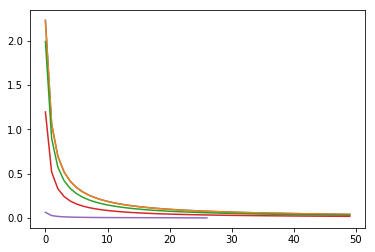

In [1058]:
plt.figure()
plt.plot(cs[10])
# plt.plot(cs[30])
plt.plot(cs[100])
# plt.plot(cs[200])
plt.plot(cs[300])
plt.plot(cs[400])
plt.plot(cs[489])
# plt.plot(cs[600])
# plt.plot(cs[800])
# plt.plot(cs[900])
# plt.plot(cs[990])

In [1059]:
find_nearest(omegai*3600/(2*np.pi), 1.1)

(1.1003535629147212, 382)

In [1060]:
tf = find_nearest(omegai*3600/(2*np.pi), 1.1)[1]

In [1075]:
alpha_j_sqrd = np.empty((len(omegai), num_modes))

In [1076]:
# for n in range(0, len(cs)):
for n in range(0, 482):
    alpha_j_sqrd[n] = (omegai[n]**2 - cor**2) / cs[n]**2

In [1077]:
print(n)
n = n + 1
print(n)

481
482


In [1078]:
Alpha_j_sqrd = alpha_j_sqrd[:n]
Cs = np.asarray(cs[:n])
Psi_prime_nh = np.asarray(psi_prime_nh[:n])
Psi_nh = np.asarray(psi_nh[:n])

In [1079]:
Alpha_j_sqrd.shape

(482, 50)

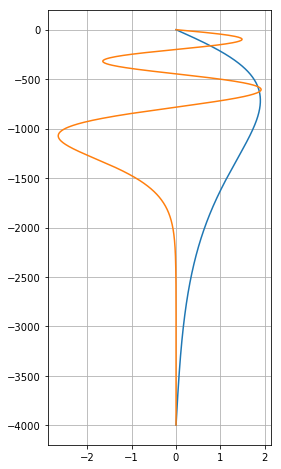

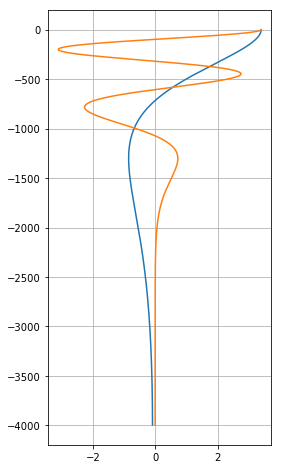

In [1080]:
plt.figure(figsize=(4, 8))
plt.plot(-1*Psi_nh[tf, :, 0], zi[:-1:4])
plt.plot(-1*Psi_nh[tf, :, 3], zi[:-1:4])
plt.grid()

plt.figure(figsize=(4, 8))
plt.plot(Psi_prime_nh[tf, :, 0], zi[:-1:4])
plt.plot(Psi_prime_nh[tf, :, 3], zi[:-1:4])
plt.grid()

Prior to proceeding we can compare the numerical modes with the WKB-modes (eqs 15 and 16 of Levine 2002). 

As a side note, the WKB modes make use of the hydrostatic approximation but unlike the hydrostatic numerical modes they handle the waveguide thickness set by the wave frequency and thus would be more accurate than the hydrostatic ones for frequencies - in theory.

#### Now we proceed with finding the energy wave spectra as a function of $z$

In [1225]:
sig = omegai[1:n]
f0 = cor

B = 2 / np.pi * f0 / sig / np.sqrt(sig**2 - f0**2)

om_func = np.ones((sig.shape))
oidx = np.logical_and(sig < omg_s2, sig > f0)
om_func[oidx] = (1. + f0 / omg_s2)*((sig[oidx] / omg_s2)**3
                                    )/(((sig[oidx]/omg_s2)**2.5) + (f0/omg_s2))

C = np.arccos(f0 / Nref) - np.arccos(f0 / omg_s2)

Bhat = .5 * np.pi * B / C * om_func

H = (js**2 + j_star**2)**-1 / jsum

In [1082]:
print(f0, Nref, sig[0], sig[-1])

# print(np.sum(Bhat*np.diff(omegai[1:n+1])))
# print(np.sum(B*np.diff(omegai[1:n+1])))

# print(np.sum(Bhat*np.diff(omegai)))
# print(np.sum(B*np.diff(omegai)))

print(np.trapz(Bhat, sig))
print(np.trapz(B, sig))

print()
print(Nprof.shape, sig.shape, Psi_nh.shape, Psi_prime_nh.shape, Alpha_j_sqrd.shape)

7.292099999999999e-05 0.0052 7.354808195321435e-05 0.004482955705237064
1.8503427299909097
0.9082106995349417

(4001,) (481,) (482, 1000, 50) (482, 1000, 50) (482, 50)


In [773]:
# G_PE = ((Nprof[None, :-1:4, None]**2 + sig[:, None, None]**2) / (2*sig[:, None, None]**2))*Psi_nh[1:]**2

In [775]:
# G_KE = ((f0**2 + sig[:, None, None]**2) / (2*sig[:, None, None]**2) / Alpha_j_sqrd[1:, None, :])*Psi_prime_nh[1:]**2

Formulas below are more consistent with those above

In [1083]:
G_KE = ((f0**2 + sig[:, None, None]**2) / (2*sig[:, None, None]**2))*Psi_prime_nh[1:]**2  # works better?

In [1084]:
G_PE = ((sig[:, None, None]**2 - f0**2) / (2*sig[:, None, None]**2))*Psi_nh[1:]**2

In [1085]:
PE_z = Eref * Bhat[:, None] * np.sum(H[None, None] * G_PE, axis=-1)
KE_z = Eref * Bhat[:, None] * np.sum(H[None, None] * G_KE, axis=-1)

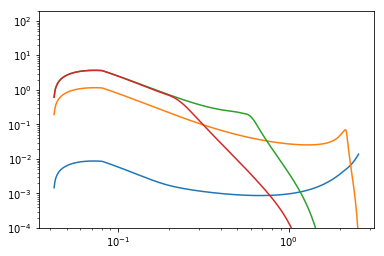

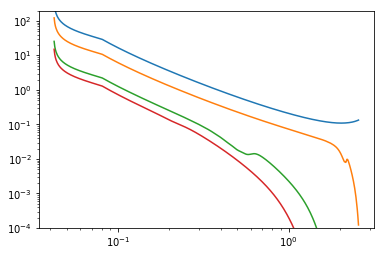

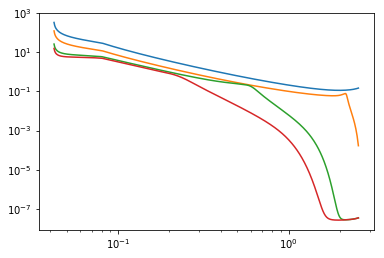

In [1086]:
plt.figure()
plt.loglog(sig*3600/(2*np.pi), PE_z[:, 1])
plt.loglog(sig*3600/(2*np.pi), PE_z[:, 100])
plt.loglog(sig*3600/(2*np.pi), PE_z[:, 500])
plt.loglog(sig*3600/(2*np.pi), PE_z[:, 800])
# plt.ylim([1e-3, 1e5])
plt.ylim([1e-4, 2e2])

plt.figure()
plt.loglog(sig*3600/(2*np.pi), KE_z[:, 1])
plt.loglog(sig*3600/(2*np.pi), KE_z[:, 100])
plt.loglog(sig*3600/(2*np.pi), KE_z[:, 500])
plt.loglog(sig*3600/(2*np.pi), KE_z[:, 800])
# plt.ylim([1e-3, 1e5])
plt.ylim([1e-4, 2e2])

plt.figure()
plt.loglog(sig*3600/(2*np.pi), PE_z[:, 1] + KE_z[:, 1])
plt.loglog(sig*3600/(2*np.pi), PE_z[:, 100] + KE_z[:, 100])
plt.loglog(sig*3600/(2*np.pi), PE_z[:, 500] + KE_z[:, 500])
plt.loglog(sig*3600/(2*np.pi), PE_z[:, 800] + KE_z[:, 800])

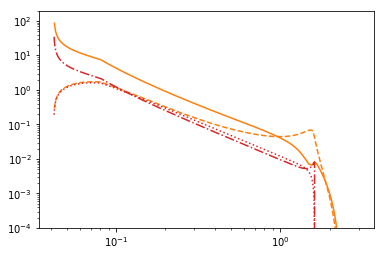

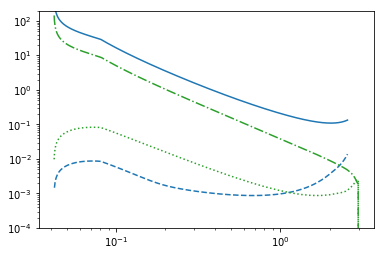

In [1226]:
plt.figure()
plt.loglog(sig*3600/(2*np.pi), PE_z[:, 200], ls='--', color='C1')
plt.loglog(sig*3600/(2*np.pi), KE_z[:, 200], color='C1')
plt.ylim([1e-4, 2e2])

sig0 = np.logspace(np.log10(f0), np.log10(N0), 1000)[1:]
plt.loglog(sig0*3600/2/np.pi, PE_star[:, :-1:4][:,200], ls=':', color='C3')
plt.loglog(sig0*3600/2/np.pi, KE_star[:, :-1:4][:,200], ls='-.', color='C3')

plt.figure()
plt.loglog(sig*3600/(2*np.pi), PE_z[:, 1], ls='--', color='C0')
plt.loglog(sig*3600/(2*np.pi), KE_z[:, 1], color='C0')
plt.ylim([1e-4, 2e2])
plt.loglog(sig0*3600/2/np.pi, PE_star[:, :-1:4][:,1], ls=':', color='C2')
plt.loglog(sig0*3600/2/np.pi, KE_star[:, :-1:4][:,1], ls='-.', color='C2')

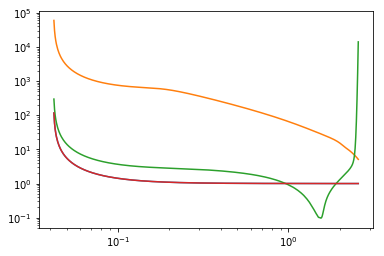

In [1227]:
plt.figure()
plt.loglog(sig*3600/(2*np.pi), (sig**2 + f0**2) / (sig**2 - f0**2))
plt.loglog(sig*3600/(2*np.pi), KE_z[:, 2]/(PE_z[:, 2])) 
plt.loglog(sig*3600/(2*np.pi), KE_z[:, 200]/(PE_z[:, 200])) 
plt.loglog(sig*3600/(2*np.pi), KE_z.sum(axis=-1)/PE_z.sum(axis=-1)) 

(1.0, 500000.0)

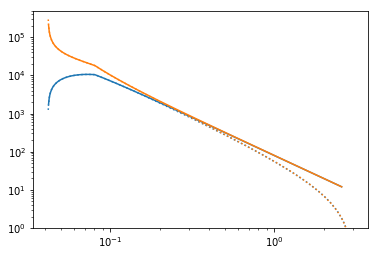

In [1236]:
plt.figure()
plt.loglog(sig*3600/(2*np.pi), PE_z.sum(axis=-1)*4)
plt.loglog(sig*3600/(2*np.pi), KE_z.sum(axis=-1)*4)
#!!! Don't use factor of 2

afac = 3.2
sig0 = np.logspace(np.log10(f0), np.log10(N0), 1000)[1:]
plt.loglog(sig0*3600/2/np.pi, afac*PE_star.sum(axis=-1), ls=':', color='C0')
# plt.loglog(sig0*3600/2/np.pi, fac*PE_ms.sum(axis=-1), ls='--', color='C0')

plt.loglog(sig0*3600/2/np.pi, afac*KE_star.sum(axis=-1), ls=':', color='C1')
# plt.loglog(sig0*3600/2/np.pi, KE_ms.sum(axis=-1), ls='--', color='C1')
plt.ylim([1e0, 5e5])

(0.8, 300.0)

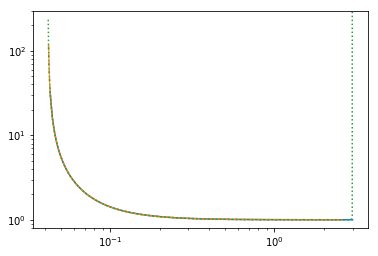

In [1234]:
plt.figure()
plt.loglog(freqs, KE_gm0/(fac*Zeta_gm0))
plt.loglog(sig*3600/(2*np.pi), KE_z.sum(axis=-1)/PE_z.sum(axis=-1), '--') 
plt.loglog(sig0*3600/(2*np.pi), KE_star.sum(axis=-1)/PE_star.sum(axis=-1), ':') 
plt.ylim([.8, 3e2])

In [1124]:
find_nearest(z_obs[:-1:4], 1000)

(1000.0, 125)

/home/smullersoares/anaconda3/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


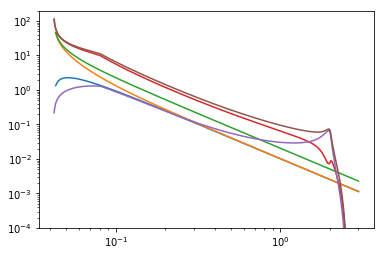

In [1237]:
plt.figure()
freqs, KE_gm0, Zeta_gm0, Gamma_gm0, SSH_gm0 = calc_gm_freq_specs(latm=30., N0=N0, b=1.3e3, Nd=Nprof[1000])
plt.loglog(freqs, fac*Zeta_gm0)
plt.loglog(freqs, KE_gm0)
plt.loglog(freqs, Gamma_gm0)
plt.ylim([1e-4, 2e2])

plt.loglog(sig*3600/(2*np.pi), KE_z[:, 125])
plt.loglog(sig*3600/(2*np.pi), PE_z[:, 125])
plt.loglog(sig*3600/(2*np.pi), KE_z[:, 125] + PE_z[:, 125])

In [1129]:
KE_gm0_z = []
Gamma_gm0_z = []
Zeta_gm0_z = []
for Nd in Nprof:
    freqs, KE_gm0, Zeta_gm0, Gamma_gm0, SSH_gm0 = calc_gm_freq_specs(latm=30., N0=N0, b=1.3e3, Nd=Nd)
    Zeta_gm0_z.append(Zeta_gm0)
    Gamma_gm0_z.append(Gamma_gm0)
    KE_gm0_z.append(KE_gm0)
KE_gm0_z = np.asarray(KE_gm0_z)
Gamma_gm0_z = np.asarray(Gamma_gm0_z)
Zeta_gm0_z = np.asarray(Zeta_gm0_z)

print(KE_gm0_z.shape)


/home/smullersoares/anaconda3/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


(4001, 2160)


In [1139]:
print(N0, Nref, max(Nprof), N0/Nref)

0.00523 0.0052 0.00523 1.005769230769231


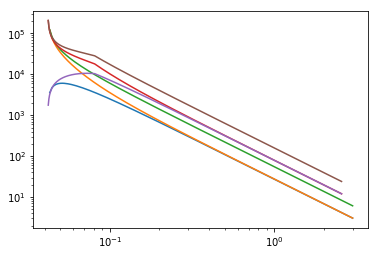

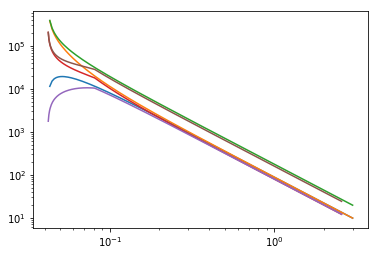

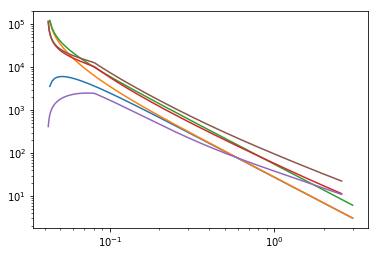

In [1238]:
plt.figure()
plt.loglog(freqs, fac*Zeta_gm0_z.sum(axis=0))
plt.loglog(freqs, KE_gm0_z.sum(axis=0))
plt.loglog(freqs, Gamma_gm0_z.sum(axis=0))
# plt.ylim([1e-4, 2e2])

plt.loglog(sig*3600/(2*np.pi), KE_z.sum(axis=-1)*4)
plt.loglog(sig*3600/(2*np.pi), PE_z.sum(axis=-1)*4)
plt.loglog(sig*3600/(2*np.pi), KE_z.sum(axis=-1)*4 + PE_z.sum(axis=-1)*4)

afac = 3.2
plt.figure()
plt.loglog(freqs, afac*fac*Zeta_gm0_z.sum(axis=0))
plt.loglog(freqs, afac*KE_gm0_z.sum(axis=0))
plt.loglog(freqs, afac*Gamma_gm0_z.sum(axis=0))
# plt.ylim([1e-4, 2e2])

plt.loglog(sig*3600/(2*np.pi), KE_z.sum(axis=-1)*4)
plt.loglog(sig*3600/(2*np.pi), PE_z.sum(axis=-1)*4)
plt.loglog(sig*3600/(2*np.pi), KE_z.sum(axis=-1)*4 + PE_z.sum(axis=-1)*4)

plt.figure()
plt.loglog(freqs, fac*Zeta_gm0_z.sum(axis=0))
plt.loglog(freqs, KE_gm0_z.sum(axis=0))
plt.loglog(freqs, Gamma_gm0_z.sum(axis=0))
# plt.ylim([1e-4, 2e2])

plt.loglog(sig*3600/(2*np.pi), np.sum(Nprof[None, :-1:4]/Nref * KE_z, axis=-1)*4)
plt.loglog(sig*3600/(2*np.pi), np.sum(Nprof[None, :-1:4]/Nref * PE_z, axis=-1)*4)
plt.loglog(sig*3600/(2*np.pi), np.sum(Nprof[None, :-1:4]/Nref * KE_z, axis=-1)*4 + np.sum(Nprof[None, :-1:4]/Nref * PE_z, axis=-1)*4)

### Vertical structure of KE and PE

In [1145]:
print(Psi_nh.shape)

(482, 1000, 50)


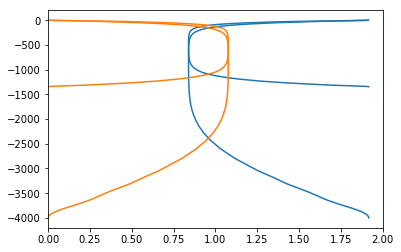

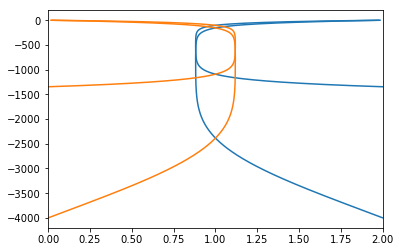

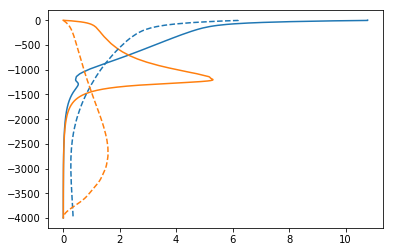

In [1239]:
plt.figure()
plt.plot(2*np.sum(H[None, None]*Vert_cos_term, axis=-1)[[150, 756]].T, zi, color='C0')
plt.plot(2*np.sum(H[None, None]*Vert_sin_term, axis=-1)[[150, 756]].T, zi, color='C1')
plt.xlim([0, 2])

plt.figure()
plt.plot(FA2[150], zi, color='C0')
plt.plot(FA2[756], zi, color='C0')
plt.plot(2 - FA2[150], zi, color='C1')
plt.plot(2 - FA2[756], zi, color='C1')
# plt.ylim([0, 1])
plt.xlim([0, 2])

plt.figure()
plt.plot(np.sum(H[None]*Psi_prime_nh[1:][tf]**2, axis=-1), zi[:-1:4], color='C0')
plt.plot(np.sum(H[None]*Psi_nh[1:][tf]**2, axis=-1), zi[:-1:4], color='C1')
plt.plot(np.sum(H[None]*Psi_prime_nh[1:][75]**2, axis=-1), zi[:-1:4], ls='--', color='C0')
plt.plot(np.sum(H[None]*Psi_nh[1:][75]**2, axis=-1), zi[:-1:4], ls='--', color='C1')

## Using the approach for $f^{2}/\omega^2_{*}$: prescribe wavenumbers $k_h$


### First for the "standard" application without the actual modes

In [64]:
kh = 2 * np.pi * np.logspace(-6, -3, 500)[:, np.newaxis]

To key parameters are given solely in terms of frequency: $D(\omega)$ and $\hat{B}$ (Energy function).

The difficulty is now finding the wave frequencies $\omega$ for $k_h$, which is not necessarily the modal frequency $\omega_j$, but we reckon we can build the wave frequency from the modal frequencies.

In the GM model, $\omega_j$ is easily found via dispersion relation because the mode vertical wavelength (1/$m$) is given by a single waveguide thickness $b$ since GM does not consider boundary effects.

Modal frequencies can also be obtained with access to modal speeds:

$\omega^2_j = f^2 + k^{2}_{h} c^{2}_{j}$ for the hydrostatic case.

But for the nonhydrostatic case, neither $\omega_j$ or $m_*$ are not readily available and thus the needed $D(\omega)$ and $\hat{B}$.

<!-- $\omega^2_j = f^2 + k^{2}_{h} c\left(\omega\right)^{2}_{j_{nh}}$ for the nonhydrostatic case [NOT SURE THIS IS RIGHT] -->

Furthermore, the nonhydrostatic $c^{2}_{j}$ can be computationally tricky as frequencies must be prescribed (not just wavenumbers), which in turn will select certain modes for a given $k_h$. 

On the other hand, in the case one has computed nonhydrostatic modes with prescribed frequencies (say the band between $f$ and $max(N)$), than the problem is mute. But once the appropriate modes are found numerically, the problem now will require dealing with complicated 3D arrays: most parameters will be functions of the prescribed $\omega$, choice $k_h$ and mode number $j$. There will be need for a direct frequency integration where the high frequency will be truncate to the local.

We will delay in taking this approach.

In [1324]:
om2_m_f2_gm = kh**2 * outs_gm.c[np.newaxis]**2
# omj2_m_f2 = kh**2 * outs.c[np.newaxis]**2  # hydrostatic modal frequency - for omega >> N should match WKB modes
# omj2_m_f2 = kh**2 * cs**2  # nonhyxtdrostatic modal frequencies per prescribed frequency - 3D array (freq, kh, j)

Another way, and previous approach, is to start with a guess and search for the appropriate vertical waveguide thickness $D(\omega)$.

For that we use m$_{*} = \frac{j \pi}{D\left( \omega \right)}\frac{N\left(z\right)}{N_{ref}}$

Then compute the frequency and check where it falls within what waveguide. Once the waveguide is reasonably guessed (various tries converged), then we can determine the appropriate m$_*$.
This makes the Levine use very similar to the GM - essentially finding the frequences required by the E formulation with the modal vertical wavenumber; with the added difficulty posed by finding $D(\omega)$ without the prescribed $\omega$.

Alternatively, the hydrostatic approximation employed by Levine for equations 15, 16 and 17 gives a $D(\omega_j)$:

$D(\omega_j) = \frac{j \pi c_j}{N_{ref}}$

which we plot below - the result is that the waveguide thickness plateus at ~1200 m at high modes; but this formulation we find to be inconsistent with the expectation that high-mode yield short frequencies that are ducted in a much shorter waveguide than implied here.

Therefore, it seems best to consider the modal frequencies and calculate the waveguide as in the previous case (as intended for the WKB modes), viz

$D(\omega_j) = \xi\left(\omega_j\right)$

In [1325]:
D_omega_cj = js * np.pi * outs_gm.c / Nref

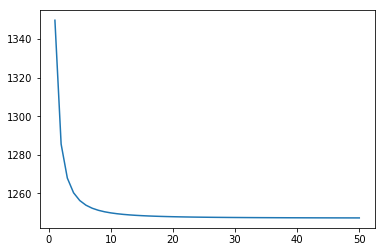

In [1326]:
plt.figure()
plt.plot(js, D_omega_cj)

In [1327]:
omega_gm = np.sqrt(cor**2 + om2_m_f2_gm)

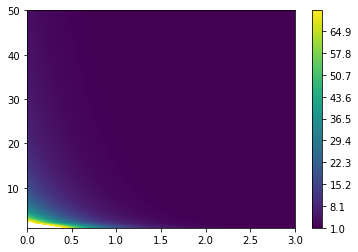

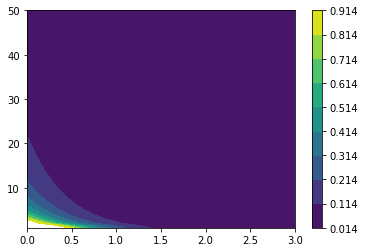

In [1328]:
plt.figure()
plt.contourf(np.log10(2*np.pi/kh[:, 0]/1e3), outs_gm.n, omega_gm.T / cor, levels=np.arange(1., N0/cor, 1e-1))
plt.colorbar()

plt.figure()
plt.contourf(np.log10(2*np.pi/kh[:, 0]/1e3), outs_gm.n, omega_gm.T / N0, levels=np.arange(cor/N0, 1., 1e-1))
plt.colorbar()

In [1329]:
D_omega_gm = np.asarray([qsi[find_nearest(Nprof, om)[1]] for om in omega_gm.ravel()]).reshape(omega_gm.shape)

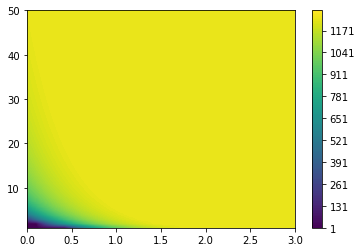

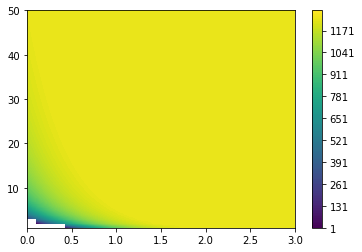

In [1330]:
nonhydromask = omega_gm > N0

plt.figure()
plt.contourf(np.log10(2*np.pi/kh[:, 0]/1e3), outs_gm.n, D_omega_gm.T, levels=np.arange(1., 1300, 10))
plt.colorbar()

plt.figure()
plt.contourf(np.log10(2*np.pi/kh[:, 0]/1e3), outs_gm.n, np.ma.masked_where(nonhydromask, D_omega_gm).T, levels=np.arange(1., 1300, 10))
plt.colorbar()

In [1331]:
# the vertical wavenumbers are a function of z as well as frequency(wavenumber) and mode number:

# m_cj = 

m_star = js[None, None] * np.pi / D_omega_gm[:, None, :] * Nprof[None, :, None] / Nref

In [1332]:
print(D_omega_gm.shape, Nprof.shape, omega_gm.shape, kh.shape)

(500, 50) (4001,) (500, 50) (500, 1)


In [1333]:
# d omega / d kh to convert E(omega, j) to E(kh, j):

# hydro version (useing m_star and thus with vertical dependency)

dsigdk = Nprof[None, :, None]**2 / omega_gm[:, None, :] * kh[..., None] / m_star**2

# hydro version for modes:

dsigdk_cj = outs_gm.c[None]**2 * kh / omega_gm 

# non-hydro version:
# dsigdk_nh = (N0**2 - f0**2) * kh * m_star**2 / (sig * (kh**2 + m_star**2)**2)

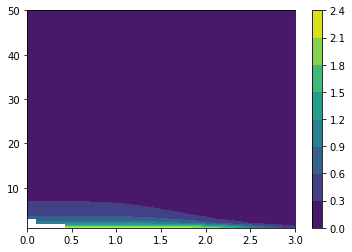

In [1334]:
plt.figure()

plt.contourf(np.log10(2*np.pi/kh[:, 0]/1e3), outs_gm.n, np.ma.masked_where(nonhydromask, dsigdk_cj).T)
plt.colorbar()

In [1335]:
sig = omega_gm
f0 = cor

B = 2 / np.pi * f0 / sig / np.sqrt(sig**2 - f0**2)

om_func = np.ones((sig.shape))
oidx = np.logical_and(sig < omg_s2, sig > f0)
om_func[oidx] = (1. + f0 / omg_s2)*((sig[oidx] / omg_s2)**3
                                    )/(((sig[oidx]/omg_s2)**2.5) + (f0/omg_s2))

C = np.arccos(f0 / Nref) - np.arccos(f0 / omg_s2)

Bhat = .5 * np.pi * B / C * om_func

H = (js**2 + j_star**2)**-1 / jsum

In [1339]:
print(sig.shape, H.shape, Bhat.shape, outs_gm.u.shape, dsigdk_cj.shape, dsigdk.shape, D_omega_gm.shape, kh.shape)

(500, 50) (50,) (500, 50) (4001, 50) (500, 50) (500, 4001, 50) (500, 50) (500, 1)


In [1337]:
G_KE = ((f0**2 + sig[:, None, :]**2) / (2*sig[:, None, :]**2))*outs_gm.u[None]**2
G_PE = ((sig[:, None, :]**2 - f0**2) / (2*sig[:, None, :]**2))*outs_gm.w[None]**2

In [1338]:
PE_z_kh = Eref * np.sum(Bhat[:, None, :] * dsigdk_cj[:, None, :] * H[None, None] * G_PE, axis=-1)
KE_z_kh = Eref * np.sum(Bhat[:, None, :] * dsigdk_cj[:, None, :] * H[None, None] * G_KE, axis=-1)

In [1340]:
Cphi_z_kh = Eref * np.sum(Bhat[:, None, :] * dsigdk_cj[:, None, :] * H[None, None] * G_PE +
                          Bhat[:, None, :] * dsigdk_cj[:, None, :] * H[None, None] * G_KE, axis=-1) / kh**2
Cpsi_z_kh = Eref * np.sum((f0**2 / sig[:, None, :]**2)*(Bhat[:, None, :] * dsigdk_cj[:, None, :] * H[None, None] * G_PE +
                                                        Bhat[:, None, :] * dsigdk_cj[:, None, :] * H[None, None] * G_KE), axis=-1) / kh**2

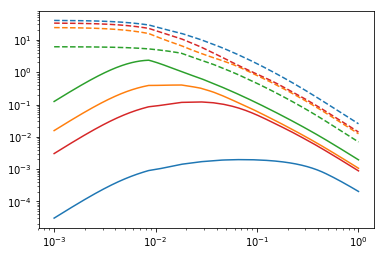

In [1341]:
plt.figure()

plt.loglog(kh[:, 0]*1e3/2/np.pi, KE_z_kh[:, 8], ls='--', color='C0')
plt.loglog(kh[:, 0]*1e3/2/np.pi, PE_z_kh[:, 8], ls='-', color='C0')

plt.loglog(kh[:, 0]*1e3/2/np.pi, KE_z_kh[:, 200], ls='--', color='C1')
plt.loglog(kh[:, 0]*1e3/2/np.pi, PE_z_kh[:, 200], ls='-', color='C1')

plt.loglog(kh[:, 0]*1e3/2/np.pi, KE_z_kh[:, 1000], ls='--', color='C2')
plt.loglog(kh[:, 0]*1e3/2/np.pi, PE_z_kh[:, 1000], ls='-', color='C2')

plt.loglog(kh[:, 0]*1e3/2/np.pi, KE_z_kh[:, 82], ls='--', color='C3')
plt.loglog(kh[:, 0]*1e3/2/np.pi, PE_z_kh[:, 82], ls='-', color='C3')

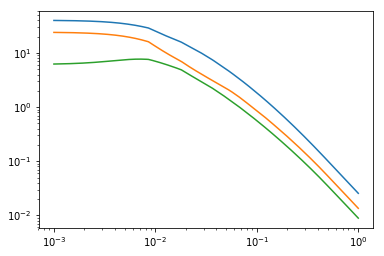

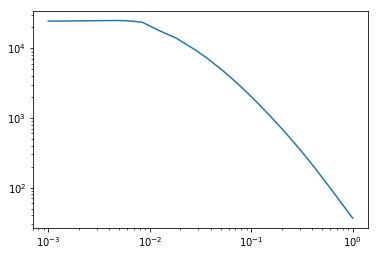

In [1342]:
plt.figure()

plt.loglog(kh[:, 0]*1e3/2/np.pi, PE_z_kh[:, 8] + KE_z_kh[:, 8], ls='-', color='C0')
plt.loglog(kh[:, 0]*1e3/2/np.pi, PE_z_kh[:, 200] + KE_z_kh[:, 200], ls='-', color='C1')
plt.loglog(kh[:, 0]*1e3/2/np.pi, PE_z_kh[:, 1000] + KE_z_kh[:, 1000], ls='-', color='C2')

plt.figure()
plt.loglog(kh[:, 0]*1e3/2/np.pi, np.sum(PE_z_kh + KE_z_kh, axis=-1), ls='-', color='C0')

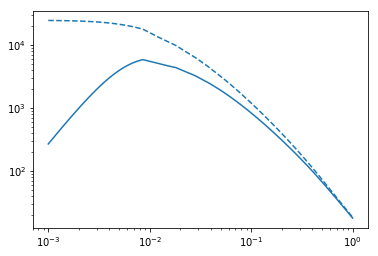

In [1343]:
plt.figure()

plt.loglog(kh[:, 0]*1e3/2/np.pi, KE_z_kh.sum(axis=-1), ls='--', color='C0')
plt.loglog(kh[:, 0]*1e3/2/np.pi, PE_z_kh.sum(axis=-1), ls='-', color='C0')

### Now we compare to the analytical

In [1344]:
qsi_over_D_gm = qsi[None, :, None] / D_omega_gm[:, None, :]
# qsi_over_D_gm = qsi[None, :, None] / D_omega_cj[None, None, :]
qsi_over_D_gm[qsi_over_D_gm > 1.] = np.nan

FA2_kh = 2 - (np.pi * j_star * (np.cosh(np.pi * j_star) -
                             np.cosh(2*np.pi * j_star * (qsi_over_D_gm - .5))
                            ) / (np.pi * j_star * np.cosh(np.pi * j_star) - np.sinh(np.pi * j_star))
          ) 

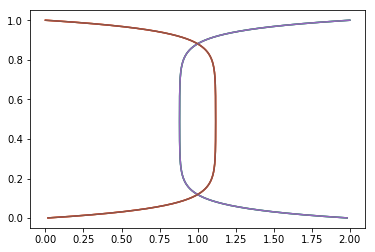

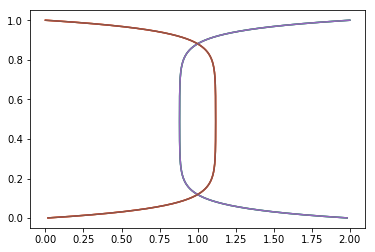

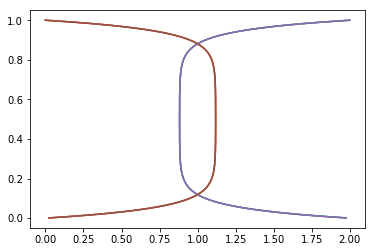

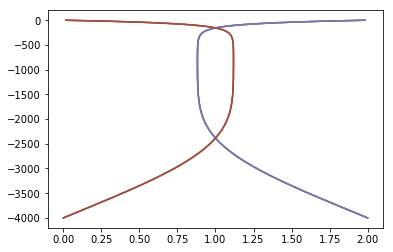

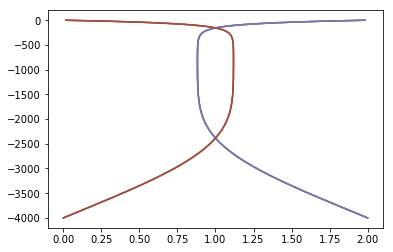

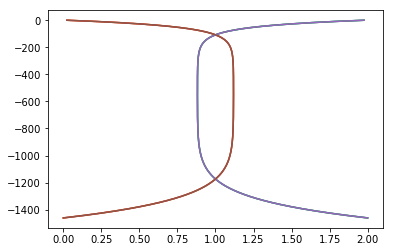

In [1346]:
plt.figure()
plt.plot(FA2_kh[50, :, 20], qsi_over_D_gm[50, :, 20]);
plt.plot(2- FA2_kh[50, :, 20], qsi_over_D_gm[50, :, 20]);

plt.plot(FA2_kh[2, :, 20], qsi_over_D_gm[2, :, 20]);
plt.plot(2- FA2_kh[2, :, 20], qsi_over_D_gm[2, :, 20]);

plt.plot(FA2_kh[300, :, 20], qsi_over_D_gm[300, :, 20]);
plt.plot(2- FA2_kh[300, :, 20], qsi_over_D_gm[300, :, 20]);

plt.figure()
plt.plot(FA2_kh[50, :, 1], qsi_over_D_gm[50, :, 1]);
plt.plot(2- FA2_kh[50, :, 1], qsi_over_D_gm[50, :, 1]);

plt.plot(FA2_kh[50, :, 1], qsi_over_D_gm[50, :, 1]);
plt.plot(2- FA2_kh[50, :, 1], qsi_over_D_gm[50, :, 1]);

plt.plot(FA2_kh[50, :, 1], qsi_over_D_gm[50, :, 1]);
plt.plot(2- FA2_kh[50, :, 1], qsi_over_D_gm[50, :, 1]);

plt.figure()
plt.plot(FA2_kh[400, :, 1], qsi_over_D_gm[400, :, 1]);
plt.plot(2- FA2_kh[400, :, 1], qsi_over_D_gm[400, :, 1]);

plt.plot(FA2_kh[400, :, 1], qsi_over_D_gm[400, :, 1]);
plt.plot(2- FA2_kh[400, :, 1], qsi_over_D_gm[400, :, 1]);

plt.plot(FA2_kh[400, :, 1], qsi_over_D_gm[400, :, 1]);
plt.plot(2- FA2_kh[400, :, 1], qsi_over_D_gm[400, :, 1]);

# plt.plot(2 - FA2_kh.T, qsi_over_D_gm.T)
# plt.ylim([0, 1])
# plt.xlim([0, 2])

plt.figure()
plt.plot(FA2_kh[50, :, 20], zi);
plt.plot(2- FA2_kh[50, :, 20], zi);

plt.plot(FA2_kh[2, :, 20], zi);
plt.plot(2- FA2_kh[2, :, 20], zi);

plt.plot(FA2_kh[300, :, 20], zi);
plt.plot(2- FA2_kh[300, :, 20], zi);

plt.figure()
plt.plot(FA2_kh[50, :, 1], zi);
plt.plot(2- FA2_kh[50, :, 1], zi);

plt.plot(FA2_kh[50, :, 1], zi);
plt.plot(2- FA2_kh[50, :, 1], zi);

plt.plot(FA2_kh[50, :, 1], zi);
plt.plot(2- FA2_kh[50, :, 1], zi);

plt.figure()
plt.plot(FA2_kh[400, :, 1], zi);
plt.plot(2- FA2_kh[400, :, 1], zi);

plt.plot(FA2_kh[400, :, 1], zi);
plt.plot(2- FA2_kh[400, :, 1], zi);

plt.plot(FA2_kh[400, :, 1], zi);
plt.plot(2- FA2_kh[400, :, 1], zi);

In [1347]:
Freq_term_KE_kh = (sig**2 + f0**2) / (sig**2)
Freq_term_PE_kh = (sig**2 - f0**2) / (sig**2)

In [1348]:
print(FA2_kh.shape, Bhat.shape, sig.shape, Freq_term_KE_kh.shape, D_omega_gm.shape, D_omega_cj.shape)

(500, 4001, 50) (500, 50) (500, 50) (500, 50) (500, 50) (50,)


In [1349]:
KE_kh_ana = .5 *Eref * Nprof[None] / Nref * np.nansum(Bhat[:, None] * dsigdk_cj[:, None, :] * Freq_term_KE_kh[:, None,] * FA2_kh, axis=-1)
PE_kh_ana = .5 * Eref * Nprof[None] / Nref * np.nansum(Bhat[:, None] * dsigdk_cj[:, None, :] * Freq_term_PE_kh[:, None,] * (2 - FA2_kh), axis=-1)

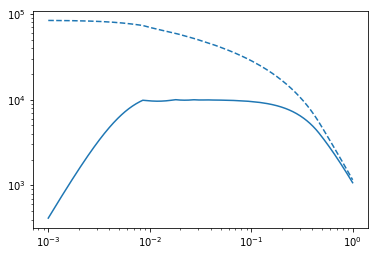

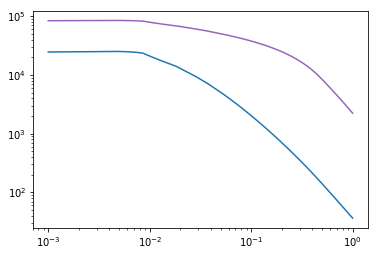

In [1350]:
plt.figure()

plt.loglog(kh[:, 0]*1e3/2/np.pi, KE_kh_ana.sum(axis=-1), ls='--', color='C0')
plt.loglog(kh[:, 0]*1e3/2/np.pi, PE_kh_ana.sum(axis=-1), ls='-', color='C0')

plt.figure()
plt.loglog(kh[:, 0]*1e3/2/np.pi, np.sum(PE_z_kh + KE_z_kh, axis=-1), ls='-', color='C0')
plt.loglog(kh[:, 0]*1e3/2/np.pi, np.sum(PE_kh_ana + KE_kh_ana, axis=-1), ls='-', color='C4')

Something is not right...

Trying with eq 30

In [1351]:
Vert_cos_term = np.cos(js[None, None] * np.pi * qsi_over_D_gm)**2
Vert_sin_term = np.sin(js[None, None] * np.pi * qsi_over_D_gm)**2

Vert_term_KE = H[None, None] * Freq_term_KE_kh[:, None, :] * Vert_cos_term
Vert_term_PE = H[None, None] * Freq_term_PE_kh[:, None, :] * Vert_sin_term

In [1352]:
KE_kh_ana = Eref * Nprof[None] / Nref * np.nansum(Bhat[:, None] * dsigdk_cj[:, None, :] * Vert_term_KE, axis=-1)
PE_kh_ana = Eref * Nprof[None] / Nref * np.nansum(Bhat[:, None] * dsigdk_cj[:, None, :] * Vert_term_PE, axis=-1)

(500, 4001) (500, 4001)


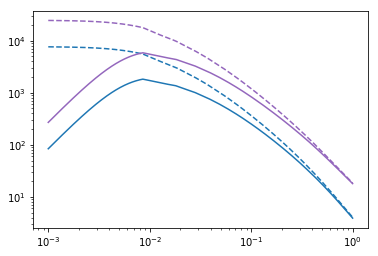

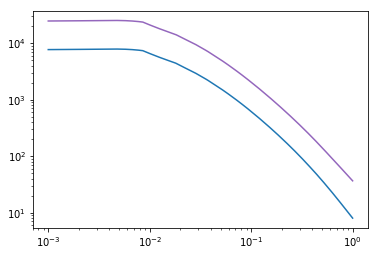

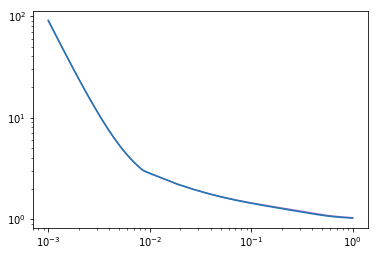

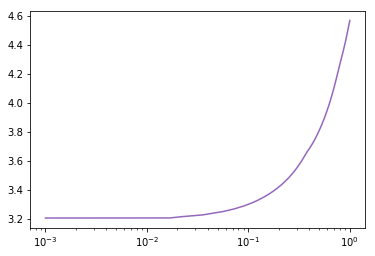

In [1353]:
print(KE_kh_ana.shape, KE_z_kh.shape)
plt.figure()

plt.loglog(kh[:, 0]*1e3/2/np.pi, KE_kh_ana.sum(axis=-1), ls='--', color='C0')
plt.loglog(kh[:, 0]*1e3/2/np.pi, PE_kh_ana.sum(axis=-1), ls='-', color='C0')
plt.loglog(kh[:, 0]*1e3/2/np.pi, KE_z_kh.sum(axis=-1), ls='--', color='C4')
plt.loglog(kh[:, 0]*1e3/2/np.pi, PE_z_kh.sum(axis=-1), ls='-', color='C4')

plt.figure()
plt.loglog(kh[:, 0]*1e3/2/np.pi, np.sum(PE_z_kh + KE_z_kh, axis=-1), ls='-', color='C4')
plt.loglog(kh[:, 0]*1e3/2/np.pi, np.sum(PE_kh_ana + KE_kh_ana, axis=-1), ls='-', color='C0')

plt.figure()
plt.loglog(kh[:, 0]*1e3/2/np.pi, KE_kh_ana.sum(axis=-1)/PE_kh_ana.sum(axis=-1), ls='-', color='C4')
plt.loglog(kh[:, 0]*1e3/2/np.pi, KE_z_kh.sum(axis=-1)/PE_z_kh.sum(axis=-1), ls='-', color='C0')

plt.figure()
plt.semilogx(kh[:, 0]*1e3/2/np.pi, np.sum(PE_z_kh + KE_z_kh, axis=-1)/np.sum(PE_kh_ana + KE_kh_ana, axis=-1),
           ls='-', color='C4')

### Compare again to the GM horizontal wavenumber spec 

Do it in 2 steps: GM with hydrostatic approx and without it (Nonhydros)

In [1305]:
def calc_gm_horzwavenum_specs(latm=30., N0=5.2e-3, b=1.3e3, Nd=None):
    '''at the top where N(z)=N0 and as a function of horz wavenumber'''

    jsum = (-1 + 3 * np.pi / np.tanh(3 * np.pi)) / 18
    f0 = calc_ip_f0(latm)[1]
    j_star = 3.
    E = 6.3e-5
    grav = 9.81
    kh = 2 * np.pi * np.logspace(-6, -1, 500)[:, np.newaxis]  # cpm?
    
    if Nd is None:
        Nd = N0

    m = np.arange(1, 10000)
    mm = np.pi * m[np.newaxis, :] / b * Nd / N0 # eq 9.23b in Munk 1981, m is mode # in GM (this is supposed to be multiplied by N(z)/N0?)

    # sig below stands for sigma (freq in GM's notation):
    sig = np.sqrt((f0**2 * mm**2 + N0**2 * kh**2) / (mm**2 + kh**2))

    # below is eq 19 (Polzin and Lvov 2011) w/ r=1, q=1/2 of GM)
    B = 2 / np.pi * f0 / sig / np.sqrt(sig**2 - f0**2)  # eq for freq dep
    H = (m**2 + j_star**2)**-1 / jsum  # eq for vertical wavenumber depence

    Freq_term_KE = (sig**2 + f0**2) / sig**2
    Freq_term_PE = (sig**2 - f0**2) / sig**2
    
    dsigdk = (N0**2 - f0**2) * kh * mm**2 / (sig * (kh**2 + mm**2)**2)
    KE = np.sum(.5 * E * (b**2)* N0*Nd * B * Freq_term_KE * H[np.newaxis] * dsigdk, axis=-1)  # KE
    Zeta = np.sum(E * (b**2)* N0*Nd * B * Freq_term_PE * H[np.newaxis] * dsigdk, axis=-1)
    SSH = np.sum(E * (b**4) * (N0**5)/Nd/((grav**2)*(np.pi**2))* Freq_term_PE * B * H[np.newaxis] * dsigdk / ((kh**2) * m[np.newaxis]**2), axis=-1)
#     PE =
#     Etot = 
    
#     for k in range(kh.size):
#         ell = np.sqrt(kh[k:]**2 - kh[k]**2)[:, 0]  # these look like BCF eqs 2.24--25, but not quite...
#         KE[k] = np.trapz(KE[k:] * ell, x=kh[k:, 0])  # actually these are BCF D^phi_W
#         Zeta[k] = np.trapz(Zeta[k:] * ell, x=kh[k:, 0])  # and D^psi_W, not C^phi/psi_W
#         SSH[k] = np.trapz(SSH[k:] * ell, x=kh[k:, 0])  # and D^psi_W, not C^phi/psi_W

    return kh[:, 0] / (2. * np.pi), KE, Zeta, SSH

In [1306]:
kh_gm, KE_gm0_kh, Zeta_gm0_kh, SSH_gm0_kh = calc_gm_horzwavenum_specs(latm=30., N0=N0, b=1.3e3, Nd=Nprof[1000])

In [1311]:
print(kh.shape, PE_kh_ana.shape, KE_kh_ana.shape, KE_gm0_kh.shape)

(500, 1) (500, 4001) (500, 4001) (500,)


(0.0009, 2.0)

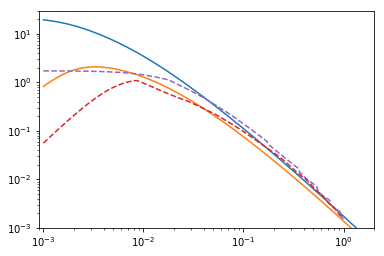

In [1310]:
plt.figure()
plt.loglog(kh_gm*1e3, KE_gm0_kh)
plt.loglog(kh_gm*1e3, .5*Zeta_gm0_kh)

plt.loglog(kh[:, 0]*1e3/2/np.pi, KE_kh_ana[:, 1000], ls='--', color='C4');
plt.loglog(kh[:, 0]*1e3/2/np.pi, PE_kh_ana[:, 1000], ls='--', color='C3');
plt.ylim([1e-3, 3e1])
plt.xlim([9e-4, 2e0])

(0.0009, 2.0)

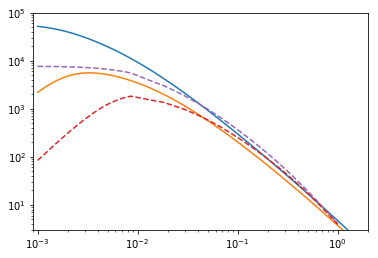

In [1316]:
plt.figure()
plt.loglog(kh_gm*1e3, np.sum((Nprof / Nprof[1000])[None] * KE_gm0_kh[:, None], axis=-1))
plt.loglog(kh_gm*1e3, .5*np.sum((Nprof / Nprof[1000])[None] * Zeta_gm0_kh[:, None], axis=-1))

plt.loglog(kh[:, 0]*1e3/2/np.pi, KE_kh_ana.sum(axis=-1), ls='--', color='C4');
plt.loglog(kh[:, 0]*1e3/2/np.pi, PE_kh_ana.sum(axis=-1), ls='--', color='C3');
plt.ylim([3e0, 1e5])
plt.xlim([9e-4, 2e0])

(0.0009, 1.1)

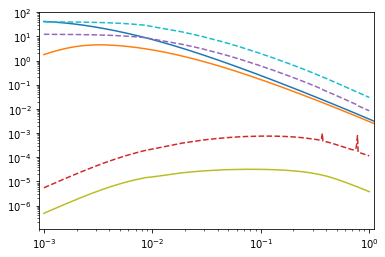

In [1320]:
plt.figure()
plt.loglog(kh_gm*1e3, N0 / Nprof[1000] * KE_gm0_kh)
plt.loglog(kh_gm*1e3, .5* N0 / Nprof[1000] * Zeta_gm0_kh)

plt.loglog(kh[:, 0]*1e3/2/np.pi, KE_kh_ana[:, 1], ls='--', color='C4');
plt.loglog(kh[:, 0]*1e3/2/np.pi, PE_kh_ana[:, 1], ls='--', color='C3');

plt.loglog(kh[:, 0]*1e3/2/np.pi, KE_z_kh[:, 1], ls='--', color='C9')
plt.loglog(kh[:, 0]*1e3/2/np.pi, PE_z_kh[:, 1], ls='-', color='C8')

# plt.ylim([1e-3, 3e1])
plt.xlim([9e-4, 1.1e0])

### The effect on the ratio of rotational to divergent 

Here, we test the use of a new frequency dependent fraction relating E to K$^{\phi}$.

Also since we known KE, we can check K$^{\phi}$ to KE relationship and thus K$^{\phi}$ to K$^{\psi}$

In [120]:
def calc_gm_omega_star_v1(latm, N0, b, Nd=None, dimscale=False, nummodes=10000):
    jsum = (-1 + 3 * np.pi / np.tanh(3 * np.pi)) / 18
    f0 = calc_ip_f0(latm)[1]
    j_star = 3.
    E = 6.3e-5

    if Nd is None:
        Nd = N0
    
    kh = 2 * np.pi * np.logspace(-6, -1, 500)[:, np.newaxis]  # rad/m

    m = np.arange(1, nummodes)
#     mm = np.pi * m[np.newaxis, :] / b  # eq 9.23b in Munk 1981, m is mode # in GM (this is supposed to be multiplied by N(z)/N0?)
    mm = np.pi * m[np.newaxis, :] / b * Nd / N0
    # sig below stands for sigma (freq in GM's notation):
#     sig = np.sqrt((f0**2 * mm**2 + N0**2 * kh**2) / (mm**2 + kh**2))  # non-hydro
    sig = np.sqrt(f0**2 + N0**2 * kh**2 / mm**2)  # hydro
    # below is eq 19 (Polzin and Lvov 2011) w/ r=1, q=1/2 of GM)
    B = 2 / np.pi * f0 / sig / np.sqrt(sig**2 - f0**2)  # eq for freq dep
    H = (m**2 + j_star**2)**-1 / jsum  # eq for vertical wavenumber depence
#     dsigdk = (N0**2 - f0**2) * kh * mm**2 / (sig * (kh**2 + mm**2)**2)  # non-hydro
    dsigdk = N0**2 * kh / mm**2 / sig  # hydro
    
    if dimscale:
        E_dim_scale_fac = N0 * Nd * b**2
        Cphi_gm = np.sum(E_dim_scale_fac * E * B * H * dsigdk / kh**2, axis=-1)
        Cpsi_gm = np.sum(f0**2 / sig**2 * E_dim_scale_fac * E * B * H * dsigdk / kh**2, axis=-1)
    else:
        Cphi_gm = np.sum(E * B * H * dsigdk / kh**2, axis=-1)
        Cpsi_gm = np.sum(f0**2 / sig**2 * E * B * H * dsigdk / kh**2, axis=-1)

    for k in range(kh.size):
        ell = np.sqrt(kh[k:]**2 - kh[k]**2)[:, 0]  # these look like BCF eqs 2.24--25, but not quite...
        Cphi_gm[k] = np.trapz(Cphi_gm[k:] * ell, x=kh[k:, 0])  # actually these are BCF D^phi_W
        Cpsi_gm[k] = np.trapz(Cpsi_gm[k:] * ell, x=kh[k:, 0])  # and D^psi_W, not C^phi/psi_W

    return kh[:, 0] / (2. * np.pi), Cpsi_gm / Cphi_gm

In [1404]:
kh00, ratio_gm00 = calc_gm_omega_star_v1(30., N0, b, Nd=N0, dimscale=True, nummodes=10000)
kh00, ratio_gm01 = calc_gm_omega_star_v1(30., N0, b, Nd=Nprof[1000], dimscale=True, nummodes=10000)

In [1414]:
kh00, ratio_gm00b = calc_gm_omega_star_v1(30., N0, b, Nd=N0, dimscale=True, nummodes=500)
kh00, ratio_gm01b = calc_gm_omega_star_v1(30., N0, b, Nd=Nprof[1000], dimscale=True, nummodes=500)

In [1412]:
kh00, ratio_gm02 = calc_gm_omega_star_v1(30., N0, b, Nd=N0, dimscale=True, nummodes=50)
kh00, ratio_gm03 = calc_gm_omega_star_v1(30., N0, b, Nd=Nprof[1000], dimscale=True, nummodes=50)

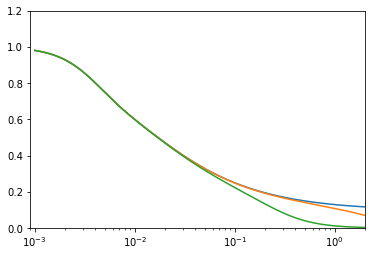

In [1416]:
plt.figure()
plt.ylim([0, 1.2])
plt.xlim([9e-4, 2e0])
plt.semilogx(kh00*1e3, ratio_gm00)
# plt.semilogx(kh00*1e3, ratio_gm01)
plt.semilogx(kh00*1e3, ratio_gm00b)
# plt.semilogx(kh00*1e3, ratio_gm01b)
plt.semilogx(kh00*1e3, ratio_gm02)
# plt.semilogx(kh00*1e3, ratio_gm03)

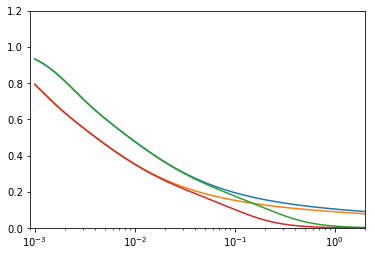

In [1425]:
kh00, ratio_gm00a = calc_gm_omega_star_v1(15., N0, b, Nd=N0, dimscale=True, nummodes=10000)
kh00, ratio_gm01a = calc_gm_omega_star_v1(15., N0, b, Nd=Nprof[1000], dimscale=True, nummodes=10000)
kh00, ratio_gm00c = calc_gm_omega_star_v1(15., N0, b, Nd=N0, dimscale=True, nummodes=100)
kh00, ratio_gm01c = calc_gm_omega_star_v1(15., N0, b, Nd=Nprof[1000], dimscale=True, nummodes=100)
kh00, ratio_gm00d = calc_gm_omega_star_v1(15., N0, b, Nd=N0, dimscale=True, nummodes=50)
kh00, ratio_gm01d = calc_gm_omega_star_v1(15., N0, b, Nd=Nprof[1000], dimscale=True, nummodes=50)

plt.figure()
plt.ylim([0, 1.2])
plt.xlim([9e-4, 2e0])
plt.semilogx(kh00*1e3, ratio_gm00a)
plt.semilogx(kh00*1e3, ratio_gm01a)
plt.semilogx(kh00*1e3, ratio_gm00c)
plt.semilogx(kh00*1e3, ratio_gm01c)
# plt.semilogx(kh00*1e3, ratio_gm00d)
# plt.semilogx(kh00*1e3, ratio_gm01d)

In [1354]:
Cphi_kh_ana = Eref * Nprof[None] / Nref * np.nansum(
    Bhat[:, None] * dsigdk_cj[:, None, :] * Vert_term_KE +
    Bhat[:, None] * dsigdk_cj[:, None, :] * Vert_term_PE, axis=-1) / (kh**2)
# Cphi_kh_z = 
# Cphi_kh_gm0 = 
Cpsi_kh_ana = Eref * Nprof[None] / Nref * np.nansum((f0**2 / sig[:, None]**2) *
    (Bhat[:, None] * dsigdk_cj[:, None, :] * Vert_term_KE +
    Bhat[:, None] * dsigdk_cj[:, None, :] * Vert_term_PE), axis=-1) / (kh**2)

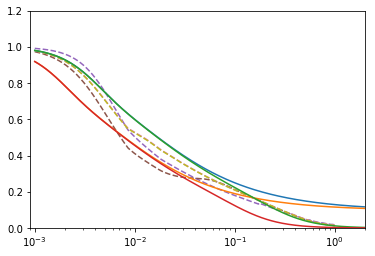

In [1405]:
plt.figure()
# plt.loglog(kh_gm*1e3, KE_gm0_kh)
# plt.loglog(kh_gm*1e3, .5*Zeta_gm0_kh)

plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_kh_ana[:, 1000]/Cphi_kh_ana[:, 1000], ls='--', color='C4');
plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_z_kh[:, 125]/Cphi_z_kh[:, 125], ls='--', color='C5');
# plt.loglog(kh[:, 0]*1e3/2/np.pi, PE_kh_ana[:, 1000], ls='--', color='C3');
plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_kh_ana[:, 1]/Cphi_kh_ana[:, 1], ls='--', color='C6');
plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_z_kh[:, 1]/Cphi_z_kh[:, 1], ls='--', color='C8');
plt.ylim([0, 1.2])
plt.xlim([9e-4, 2e0])
plt.semilogx(kh00*1e3, ratio_gm00)
plt.semilogx(kh00*1e3, ratio_gm01)
plt.semilogx(kh00*1e3, ratio_gm02)
plt.semilogx(kh00*1e3, ratio_gm03)

(0.0009, 2.0)

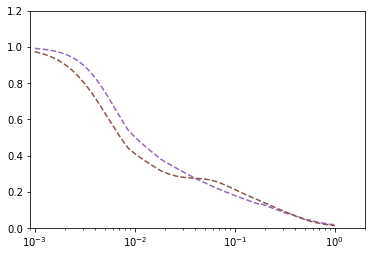

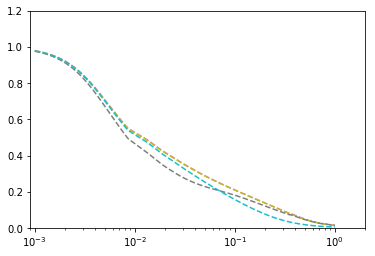

In [1420]:
plt.figure()
plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_kh_ana[:, 1000]/Cphi_kh_ana[:, 1000], ls='--', color='C4');
plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_z_kh[:, 125]/Cphi_z_kh[:, 125], ls='--', color='C5');
plt.ylim([0, 1.2])
plt.xlim([9e-4, 2e0])

plt.figure()
plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_kh_ana[:, 1]/Cphi_kh_ana[:, 1], ls='--', color='C6');
plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_z_kh[:, 1]/Cphi_z_kh[:, 1], ls='--', color='C8');
plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_kh_ana[:, 61]/Cphi_kh_ana[:, 61], ls='--', color='C7');
plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_z_kh[:, 15]/Cphi_z_kh[:, 15], ls='--', color='C9');
plt.ylim([0, 1.2])
plt.xlim([9e-4, 2e0])

### Apply the wavenumber using the nonhydrostatic modes?

This is more convoluted because the nonhydrostatic modes require a prescription of frequency [which is not necessarily the modal frequency]

But the experience with the GM indicates that using NH is not very important.

The best to improve high wavenumber ratios is to use more modes ($\gg 100$), which for practical applications involving numerically computing the modes is difficult.

#### Using converge waveguide

In [1394]:
print(kh.shape, js.shape)

(500, 1) (50,)


## Finally, an application to a real $N^2$ profile

In [8]:
find_nearest(z_obs, 4000)

(4000.0, 2000)

(1000,)


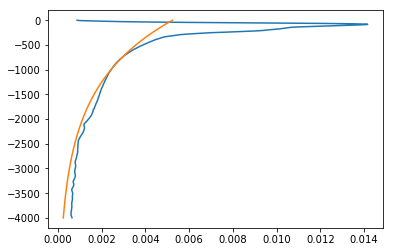

In [9]:
plt.figure()
plt.plot(Nobs_smo_north[:2000:2], -z_obs[:2000:2])
plt.plot(Nprof, zi)
print(Nobs_smo_north[:2000:2].shape)

In [10]:
ip, cor = calc_ip_f0(18.)
omegai = np.logspace(np.log10(cor), np.log10(max(Nobs_smo_north)), 500)

In [11]:
print(max(Nobs_smo_north))
print(min(Nobs_smo_north), min(Nobs_smo_north)/cor)
print(z_obs[:2000:2][8], z_obs[:2000:2][80])

0.014165071024967894
0.00015175687066822948 3.367312225113716
32.0 320.0


In [23]:
num_modes = 50
j_star = 3.
jsum = (-1 + j_star * np.pi / np.tanh(j_star * np.pi)) / (2 * j_star**2)
Eref = .92e-3

js = np.arange(1, num_modes + 1)

M2 = 12.42 * 3600.
omg_s2 = 2. * np.pi / M2

In [14]:
%%time
psi_nh_obs = []
psi_prime_nh_obs = []
cs_obs = []
for n, omi in enumerate(omegai):
    outs = modes.modes(-z_obs[:2000:2], Nobs_smo_north[:2000:2]**2 - omi**2, nmodes=num_modes, method='matrix')
    cs_obs.append(outs.c)
    psi_nh_obs.append(outs.w)
    psi_prime_nh_obs.append(outs.u)

CPU times: user 1h 21min 51s, sys: 29min 43s, total: 1h 51min 35s
Wall time: 48min 40s


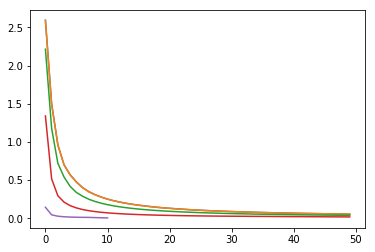

In [15]:
plt.figure()
plt.plot(cs_obs[10])
plt.plot(cs_obs[100])
plt.plot(cs_obs[300])
plt.plot(cs_obs[400])
plt.plot(cs_obs[489])

In [18]:
Cs_obs = np.asarray(cs_obs[:n])
Psi_prime_nh_obs = np.asarray(psi_prime_nh_obs[:n])
Psi_nh_obs = np.asarray(psi_nh_obs[:n])

ValueError: could not broadcast input array from shape (1000,50) into shape (1000)

In [16]:
Cs_obs = np.asarray(cs_obs[:-60])
Psi_prime_nh_obs = np.asarray(psi_prime_nh_obs[:-60])
Psi_nh_obs = np.asarray(psi_nh_obs[:-60])

In [17]:
Psi_nh_obs.shape

(440, 1000, 50)

In [18]:
tf = find_nearest(omegai*3600/(2*np.pi), 1.1)[1]

In [20]:
find_nearest(omegai*3600/(2*np.pi), 1.1*cor*3600/(2*np.pi))[1]

8

In [40]:
print(sig[7], sig[7]*3600/(2*np.pi), 1.1*cor*3600/(2*np.pi), 1.1*cor)

4.941999662718476e-05 0.0283155723028845 0.02840405160593461 4.957442214299419e-05


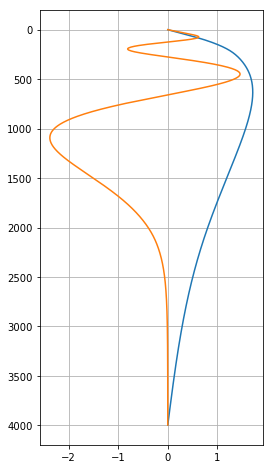

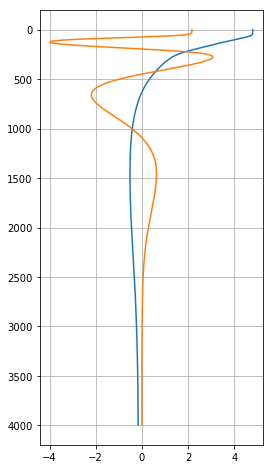

In [22]:
plt.figure(figsize=(4, 8))
plt.plot(-1*Psi_nh_obs[tf, :, 0], z_obs[:2000:2])
plt.plot(-1*Psi_nh_obs[tf, :, 3], z_obs[:2000:2])
plt.grid()
plt.gca().invert_yaxis()

plt.figure(figsize=(4, 8))
plt.plot(Psi_prime_nh_obs[tf, :, 0], z_obs[:2000:2])
plt.plot(Psi_prime_nh_obs[tf, :, 3], z_obs[:2000:2])
plt.grid()
plt.gca().invert_yaxis()


In [24]:
# sig = omegai[1:len(omegai)-1]
sig = omegai[1:len(omegai)-60]
f0 = cor

B = 2 / np.pi * f0 / sig / np.sqrt(sig**2 - f0**2)

om_func = np.ones((sig.shape))
oidx = np.logical_and(sig < omg_s2, sig > f0)
om_func[oidx] = (1. + f0 / omg_s2)*((sig[oidx] / omg_s2)**3
                                    )/(((sig[oidx]/omg_s2)**2.5) + (f0/omg_s2))

C = np.arccos(f0 / Nref) - np.arccos(f0 / omg_s2)

Bhat = .5 * np.pi * B / C * om_func

H = (js**2 + j_star**2)**-1 / jsum

In [25]:
print(sig.shape, Psi_prime_nh_obs.shape, H.shape)

(439,) (440, 1000, 50) (50,)


In [26]:
G_KE_obs = ((f0**2 + sig[:, None, None]**2) / (2*sig[:, None, None]**2))*Psi_prime_nh_obs[1:]**2  # works better?
G_PE_obs = ((sig[:, None, None]**2 - f0**2) / (2*sig[:, None, None]**2))*Psi_nh_obs[1:]**2

In [27]:
PE_z_obs = Eref * Bhat[:, None] * np.sum(H[None, None] * G_PE_obs, axis=-1)
KE_z_obs = Eref * Bhat[:, None] * np.sum(H[None, None] * G_KE_obs, axis=-1)

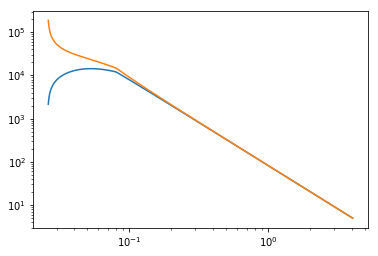

In [28]:
plt.figure()
plt.loglog(sig*3600/(2*np.pi), PE_z_obs.sum(axis=-1)*4)
plt.loglog(sig*3600/(2*np.pi), KE_z_obs.sum(axis=-1)*4)

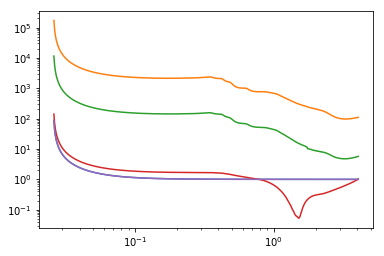

In [29]:
plt.figure()
plt.loglog(sig*3600/(2*np.pi), (sig**2 + f0**2) / (sig**2 - f0**2))
plt.loglog(sig*3600/(2*np.pi), KE_z_obs[:, 2]/(PE_z_obs[:, 2])) 
plt.loglog(sig*3600/(2*np.pi), KE_z_obs[:, 8]/(PE_z_obs[:, 8])) 
plt.loglog(sig*3600/(2*np.pi), KE_z_obs[:, 200]/(PE_z_obs[:, 200])) 
plt.loglog(sig*3600/(2*np.pi), KE_z_obs.sum(axis=-1)/PE_z_obs.sum(axis=-1)) 

In [30]:
Vert_sruct_PE = np.sum(H[None, None] * G_PE_obs, axis=-1)

In [31]:
Vert_sruct_KE = np.sum(H[None, None] * G_KE_obs, axis=-1)

In [32]:
find_nearest(sig, f0*1.1)

(4.941999662718476e-05, 7)

Text(0.5, 0, 'PE factor')

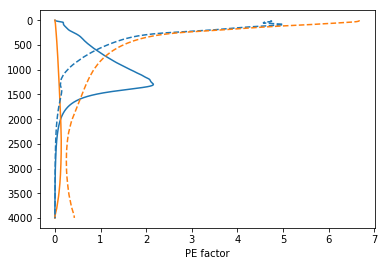

In [33]:
plt.figure()
plt.plot(Vert_sruct_PE.T[:, tf], z_obs[:2000:2]);
plt.plot(Vert_sruct_PE.T[:, 8], z_obs[:2000:2]);
plt.gca().invert_yaxis()
plt.xlabel("PE factor")

plt.plot(Vert_sruct_KE.T[:, tf], z_obs[:2000:2], ls='--', color='C0');
plt.plot(Vert_sruct_KE.T[:, 8], z_obs[:2000:2], ls='--', color='C1');
plt.xlabel("PE factor")

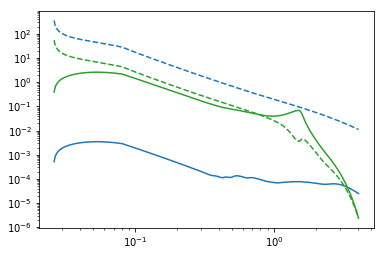

In [32]:
plt.figure()
plt.loglog(sig*3600/(2*np.pi), PE_z_obs[:, 1], color='C0')
plt.loglog(sig*3600/(2*np.pi), KE_z_obs[:, 1], ls='--', color='C0')

# plt.loglog(sig*3600/(2*np.pi), PE_z_obs[:, 8], color='C1')
# plt.loglog(sig*3600/(2*np.pi), KE_z_obs[:, 8], ls='--', color='C1')

plt.loglog(sig*3600/(2*np.pi), PE_z_obs[:, 200], color='C2')
plt.loglog(sig*3600/(2*np.pi), KE_z_obs[:, 200], ls='--', color='C2')
# plt.ylim([1e-4, 2e2])

In [34]:
sig[tf]

0.0019516747037892676

In [35]:
dz = 4.
Nref = N0
qsi = np.cumsum(Nobs_smo_north[:2000:2] * dz) / Nref
D_omega = np.asarray([qsi[find_nearest(Nobs_smo_north[:2000:2], om)[1]] for om in sig])
qsi_over_D = qsi / D_omega[:, None]

FA3 = 2 - (np.pi * j_star * (np.cosh(np.pi * j_star) -
                             np.cosh(2*np.pi * j_star * (qsi_over_D - .5))
                            ) / (np.pi * j_star * np.cosh(np.pi * j_star) - np.sinh(np.pi * j_star))
          ) 

/home/smullersoares/anaconda3/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in cosh
  if __name__ == '__main__':
/home/smullersoares/anaconda3/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in multiply
  if __name__ == '__main__':


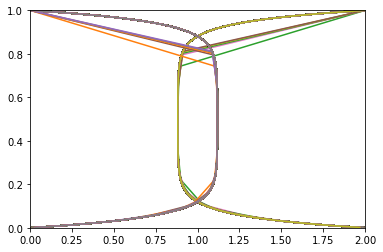

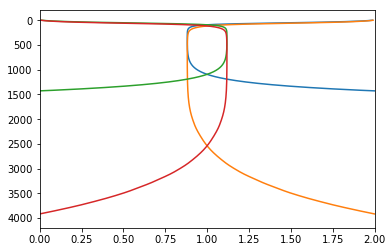

In [36]:
plt.figure()
plt.plot(FA3.T, qsi_over_D.T)
plt.plot(2 - FA3.T, qsi_over_D.T)
plt.ylim([0, 1])
plt.xlim([0, 2])

plt.figure()
plt.plot(FA3[tf], z_obs[:2000:2])
plt.plot(FA3[10], z_obs[:2000:2])
plt.plot(2 - FA3[tf], z_obs[:2000:2])
plt.plot(2 - FA3[10], z_obs[:2000:2])
# plt.ylim([0, 1])
plt.xlim([0, 2])
plt.gca().invert_yaxis()

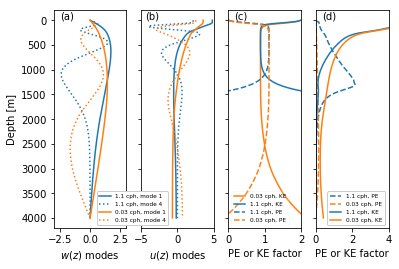

In [74]:
fig, ax = plt.subplots(1, 4, figsize=(6., 4.), sharey=True)

ax[2].plot(FA3[10], z_obs[:2000:2], color='C1', label="0.03 cph, KE")
ax[2].plot(FA3[tf], z_obs[:2000:2], color='C0', label="1.1 cph, KE")
ax[2].plot(2 - FA3[tf], z_obs[:2000:2], color='C0', ls='--', label="1.1 cph, PE")
ax[2].plot(2 - FA3[10], z_obs[:2000:2], color='C1', ls='--', label="0.03 cph, PE")

ax[2].set_xlim([0, 2])
ax[0].set_ylabel("Depth [m]")
ax[0].invert_yaxis()

ax[3].plot(Vert_sruct_PE.T[:, tf], z_obs[:2000:2], ls='--', color='C0', label="1.1 cph, PE");
ax[3].plot(Vert_sruct_PE.T[:, 10], z_obs[:2000:2], ls='--', color='C1', label="0.03 cph, PE");
ax[3].plot(Vert_sruct_KE.T[:, tf], z_obs[:2000:2], color='C0', label="1.1 cph, KE");
ax[3].plot(Vert_sruct_KE.T[:, 10], z_obs[:2000:2], color='C1', label="0.03 cph, KE");
ax[3].set_xlim([0, 4])

ax[0].plot(-1*Psi_nh_obs[tf, :, 0], z_obs[:2000:2], color='C0', label="1.1 cph, mode 1")
ax[0].plot(-1*Psi_nh_obs[tf, :, 3], z_obs[:2000:2], color='C0', ls=':', label="1.1 cph, mode 4")
ax[1].plot(Psi_prime_nh_obs[tf, :, 0], z_obs[:2000:2], color='C0', label="1.1 cph, mode 1")
ax[1].plot(Psi_prime_nh_obs[tf, :, 3], z_obs[:2000:2], color='C0', ls=':', label="1.1 cph, mode 4")

ax[0].plot(-1*Psi_nh_obs[10, :, 0], z_obs[:2000:2], color='C1', label="0.03 cph, mode 1")
ax[0].plot(-1*Psi_nh_obs[10, :, 3], z_obs[:2000:2], color='C1', ls=':', label="0.03 cph, mode 4")
ax[1].plot(Psi_prime_nh_obs[10, :, 0], z_obs[:2000:2], color='C1', label="0.03 cph, mode 1")
ax[1].plot(Psi_prime_nh_obs[10, :, 3], z_obs[:2000:2], color='C1', ls=':', label="0.03 cph, mode 4")

ax[0].set_xlim([-3, 3])
ax[1].set_xlim([-5, 5])

ax[0].set_xlabel(r"$w(z)$ modes")
ax[1].set_xlabel(r"$u(z)$ modes")
ax[2].set_xlabel("PE or KE factor")
ax[3].set_xlabel("PE or KE factor")

ax[0].text(-2.5, -30, "(a)")
ax[1].text(-4.5, -30., "(b)")
ax[2].text(.15, -30., "(c)")
ax[3].text(.35, -30., "(d)")

ax[1].legend(loc=3, frameon=True, fontsize='xx-small', bbox_to_anchor=[-.65, 0, 0, 0], framealpha=1)
# ax[1].legend(loc=0, frameon=False)
ax[-1].legend(loc=3, frameon=True, fontsize='xx-small', bbox_to_anchor=[.12, 0.0, 0, 0], framealpha=1)
ax[-2].legend(loc=3, frameon=True, fontsize='xx-small', bbox_to_anchor=[.0, 0.0, 0, 0], framealpha=.1)

fig.savefig("../analyses/figures/modes_and_KE_PE_struc_L02.pdf", bbox_inches='tight')

In [75]:
kh = 2 * np.pi * np.logspace(-6, -3, 500)[:, np.newaxis]

In [76]:
outs_hydro = modes.modes(-z_obs[:2000:2], Nobs_smo_north[:2000:2]**2, nmodes=num_modes)

In [77]:
om2_m_f2_hydro = kh**2 * outs_hydro.c[np.newaxis]**2

In [78]:
omega_hydro = np.sqrt(cor**2 + om2_m_f2_hydro)

In [79]:
D_omega_cj = js * np.pi * outs_hydro.c / Nref
D_omega_hydro = np.asarray([qsi[find_nearest(Nobs_smo_north[:2000:2], om)[1]] for om in omega_hydro.ravel()]).reshape(omega_hydro.shape)

In [80]:
m_star = js[None, None] * np.pi / D_omega_hydro[:, None, :] * Nobs_smo_north[:2000:2][None, :, None] / Nref

In [81]:
# d omega / d kh to convert E(omega, j) to E(kh, j):

# hydro version (useing m_star and thus with vertical dependency)

dsigdk = Nobs_smo_north[:2000:2][None, :, None]**2 / omega_hydro[:, None, :] * kh[..., None] / m_star**2

# hydro version for modes:

dsigdk_cj = outs_hydro.c[None]**2 * kh / omega_hydro

# non-hydro version [too complicated]:
# dsigdk_nh = (N0**2 - f0**2) * kh * m_star**2 / (sig * (kh**2 + m_star**2)**2)

In [82]:
sig = omega_hydro
f0 = cor

B = 2 / np.pi * f0 / sig / np.sqrt(sig**2 - f0**2)

om_func = np.ones((sig.shape))
oidx = np.logical_and(sig < omg_s2, sig > f0)
om_func[oidx] = (1. + f0 / omg_s2)*((sig[oidx] / omg_s2)**3
                                    )/(((sig[oidx]/omg_s2)**2.5) + (f0/omg_s2))

C = np.arccos(f0 / Nref) - np.arccos(f0 / omg_s2)

Bhat = .5 * np.pi * B / C * om_func

H = (js**2 + j_star**2)**-1 / jsum

In [83]:
G_KE = ((f0**2 + sig[:, None, :]**2) / (2*sig[:, None, :]**2))*outs_hydro.u[None]**2
G_PE = ((sig[:, None, :]**2 - f0**2) / (2*sig[:, None, :]**2))*outs_hydro.w[None]**2

In [84]:
Cphi_z_kh = Eref * np.sum(Bhat[:, None, :] * dsigdk_cj[:, None, :] * H[None, None] * G_PE +
                          Bhat[:, None, :] * dsigdk_cj[:, None, :] * H[None, None] * G_KE, axis=-1) / kh**2
Cpsi_z_kh = Eref * np.sum((f0**2 / sig[:, None, :]**2)*(Bhat[:, None, :] * dsigdk_cj[:, None, :] * H[None, None] * G_PE +
                                                        Bhat[:, None, :] * dsigdk_cj[:, None, :] * H[None, None] * G_KE), axis=-1) / kh**2

In [85]:
# analytical vertical structure

qsi_over_D_hydro = qsi[None, :, None] / D_omega_hydro[:, None, :]
# qsi_over_D_hydro = qsi[None, :, None] / D_omega_cj[None, None, :]
qsi_over_D_hydro[qsi_over_D_hydro > 1.] = np.nan

FA2_kh = 2 - (np.pi * j_star * (np.cosh(np.pi * j_star) -
                             np.cosh(2*np.pi * j_star * (qsi_over_D_hydro - .5))
                            ) / (np.pi * j_star * np.cosh(np.pi * j_star) - np.sinh(np.pi * j_star))
          )

Freq_term_KE_kh = (sig**2 + f0**2) / (sig**2)
Freq_term_PE_kh = (sig**2 - f0**2) / (sig**2)

Vert_cos_term = np.cos(js[None, None] * np.pi * qsi_over_D_hydro)**2
Vert_sin_term = np.sin(js[None, None] * np.pi * qsi_over_D_hydro)**2

Vert_term_KE = H[None, None] * Freq_term_KE_kh[:, None, :] * Vert_cos_term
Vert_term_PE = H[None, None] * Freq_term_PE_kh[:, None, :] * Vert_sin_term

# Vert_term_KE = H[None, None] * Freq_term_KE_kh[:, None, :] * FA2_kh
# Vert_term_PE = H[None, None] * Freq_term_PE_kh[:, None, :] * (2 - FA2_kh)

In [86]:
Cphi_kh_ana = Eref * Nobs_smo_north[:2000:2][None] / Nref * np.nansum(
    Bhat[:, None] * dsigdk_cj[:, None, :] * Vert_term_KE +
    Bhat[:, None] * dsigdk_cj[:, None, :] * Vert_term_PE, axis=-1) / (kh**2)

Cpsi_kh_ana = Eref * Nobs_smo_north[:2000:2][None] / Nref * np.nansum((f0**2 / sig[:, None]**2) *
    (Bhat[:, None] * dsigdk_cj[:, None, :] * Vert_term_KE +
    Bhat[:, None] * dsigdk_cj[:, None, :] * Vert_term_PE), axis=-1) / (kh**2)

(0.0009, 2.0)

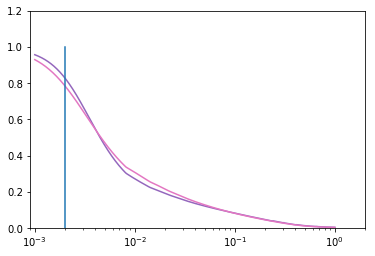

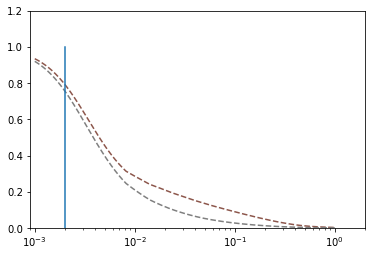

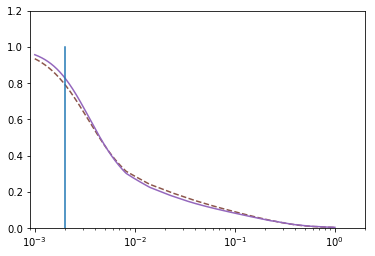

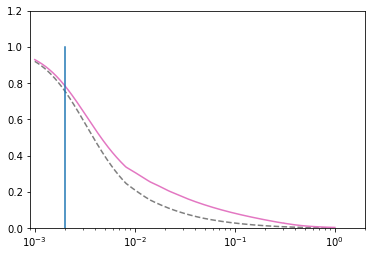

In [90]:
plt.figure()

plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_kh_ana[:, 125]/Cphi_kh_ana[:, 125], ls='-', color='C4');
# plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_z_kh[:, 125]/Cphi_z_kh[:, 125], ls='--', color='C5');

plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_kh_ana[:, 8]/Cphi_kh_ana[:, 8], ls='-', color='C6');
# plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_z_kh[:, 8]/Cphi_z_kh[:, 8], ls='--', color='C7');

plt.plot([1./500, 1./500], [0, 1])
plt.ylim([0, 1.2])
plt.xlim([9e-4, 2e0])

plt.figure()
plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_z_kh[:, 125]/Cphi_z_kh[:, 125], ls='--', color='C5');
plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_z_kh[:, 8]/Cphi_z_kh[:, 8], ls='--', color='C7');

plt.plot([1./500, 1./500], [0, 1])
plt.ylim([0, 1.2])
plt.xlim([9e-4, 2e0])

plt.figure()
plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_z_kh[:, 125]/Cphi_z_kh[:, 125], ls='--', color='C5');
plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_kh_ana[:, 125]/Cphi_kh_ana[:, 125], ls='-', color='C4');

plt.plot([1./500, 1./500], [0, 1])
plt.ylim([0, 1.2])
plt.xlim([9e-4, 2e0])

plt.figure()
plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_z_kh[:, 8]/Cphi_z_kh[:, 8], ls='--', color='C7');
plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_kh_ana[:, 8]/Cphi_kh_ana[:, 8], ls='-', color='C6');

plt.plot([1./500, 1./500], [0, 1])
plt.ylim([0, 1.2])
plt.xlim([9e-4, 2e0])

In [92]:
def calc_gm_omega_star_v1(latm, N0, b, Nd=None, dimscale=False, nummodes=10000):
    jsum = (-1 + 3 * np.pi / np.tanh(3 * np.pi)) / 18
    f0 = calc_ip_f0(latm)[1]
    j_star = 3.
    E = 6.3e-5

    if Nd is None:
        Nd = N0
    
    kh = 2 * np.pi * np.logspace(-6, -1, 500)[:, np.newaxis]  # rad/m

    m = np.arange(1, nummodes)
#     mm = np.pi * m[np.newaxis, :] / b  # eq 9.23b in Munk 1981, m is mode # in GM (this is supposed to be multiplied by N(z)/N0?)
    mm = np.pi * m[np.newaxis, :] / b * Nd / N0
    # sig below stands for sigma (freq in GM's notation):
#     sig = np.sqrt((f0**2 * mm**2 + N0**2 * kh**2) / (mm**2 + kh**2))  # non-hydro
    sig = np.sqrt(f0**2 + N0**2 * kh**2 / mm**2)  # hydro
    # below is eq 19 (Polzin and Lvov 2011) w/ r=1, q=1/2 of GM)
    B = 2 / np.pi * f0 / sig / np.sqrt(sig**2 - f0**2)  # eq for freq dep
    H = (m**2 + j_star**2)**-1 / jsum  # eq for vertical wavenumber depence
#     dsigdk = (N0**2 - f0**2) * kh * mm**2 / (sig * (kh**2 + mm**2)**2)  # non-hydro
    dsigdk = N0**2 * kh / mm**2 / sig  # hydro
    
    if dimscale:
        E_dim_scale_fac = N0 * Nd * b**2
        Cphi_gm = np.sum(E_dim_scale_fac * E * B * H * dsigdk / kh**2, axis=-1)
        Cpsi_gm = np.sum(f0**2 / sig**2 * E_dim_scale_fac * E * B * H * dsigdk / kh**2, axis=-1)
    else:
        Cphi_gm = np.sum(E * B * H * dsigdk / kh**2, axis=-1)
        Cpsi_gm = np.sum(f0**2 / sig**2 * E * B * H * dsigdk / kh**2, axis=-1)

    for k in range(kh.size):
        ell = np.sqrt(kh[k:]**2 - kh[k]**2)[:, 0]  # these look like BCF eqs 2.24--25, but not quite...
        Cphi_gm[k] = np.trapz(Cphi_gm[k:] * ell, x=kh[k:, 0])  # actually these are BCF D^phi_W
        Cpsi_gm[k] = np.trapz(Cpsi_gm[k:] * ell, x=kh[k:, 0])  # and D^psi_W, not C^phi/psi_W

    return kh[:, 0] / (2. * np.pi), Cpsi_gm / Cphi_gm


def calc_gm_omega_star_v2(latm, N0, b, Nd=None, dimscale=False, nummodes=10000):
    jsum = (-1 + 3 * np.pi / np.tanh(3 * np.pi)) / 18
    f0 = calc_ip_f0(latm)[1]
    j_star = 3.
    E = 6.3e-5

    if Nd is None:
        Nd = N0
    
    kh = 2 * np.pi * np.logspace(-6, -1, 500)[:, np.newaxis]  # rad/m

    m = np.arange(1, nummodes)
#     mm = np.pi * m[np.newaxis, :] / b  # eq 9.23b in Munk 1981, m is mode # in GM (this is supposed to be multiplied by N(z)/N0?)
    mm = np.pi * m[np.newaxis, :] / b * Nd / N0
    # sig below stands for sigma (freq in GM's notation):
#     sig = np.sqrt((f0**2 * mm**2 + N0**2 * kh**2) / (mm**2 + kh**2))  # non-hydro
    sig = np.sqrt(f0**2 + N0**2 * kh**2 / mm**2)  # hydro
    # below is eq 19 (Polzin and Lvov 2011) w/ r=1, q=1/2 of GM)
    B = 2 / np.pi * f0 / sig / np.sqrt(sig**2 - f0**2)  # eq for freq dep
    H = (m**2 + j_star**2)**-1 / jsum  # eq for vertical wavenumber depence
#     dsigdk = (N0**2 - f0**2) * kh * mm**2 / (sig * (kh**2 + mm**2)**2)  # non-hydro
    dsigdk = N0**2 * kh / mm**2 / sig  # hydro
    
    if dimscale:
        E_dim_scale_fac = N0 * Nd * b**2
        Cphi_gm = np.sum(E_dim_scale_fac * E * B * H * dsigdk / kh**2, axis=-1)
        Cpsi_gm = np.sum(f0**2 / sig**2 * E_dim_scale_fac * E * B * H * dsigdk / kh**2, axis=-1)
    else:
        Cphi_gm = np.sum(E * B * H * dsigdk / kh**2, axis=-1)
        Cpsi_gm = np.sum(f0**2 / sig**2 * E * B * H * dsigdk / kh**2, axis=-1)

#     for k in range(kh.size):
#         ell = np.sqrt(kh[k:]**2 - kh[k]**2)[:, 0]  # these look like BCF eqs 2.24--25, but not quite...
#         Cphi_gm[k] = np.trapz(Cphi_gm[k:] * ell, x=kh[k:, 0])  # actually these are BCF D^phi_W
#         Cpsi_gm[k] = np.trapz(Cpsi_gm[k:] * ell, x=kh[k:, 0])  # and D^psi_W, not C^phi/psi_W

    return kh[:, 0] / (2. * np.pi), Cpsi_gm / Cphi_gm

In [94]:
kh00, ratio_gm00a = calc_gm_omega_star_v2(18., 10.3e-3, .804e3, Nd=None, dimscale=True, nummodes=10000)
kh00, ratio_gm00b = calc_gm_omega_star_v2(18., 10.3e-3, .804e3, Nd=None, dimscale=True, nummodes=50)

(0.0009, 2.0)

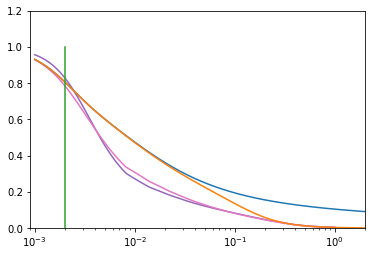

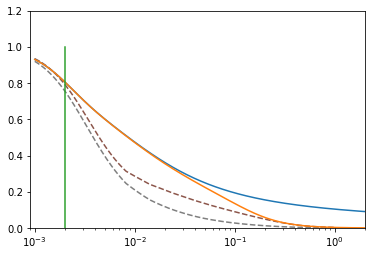

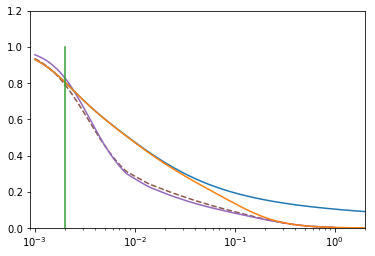

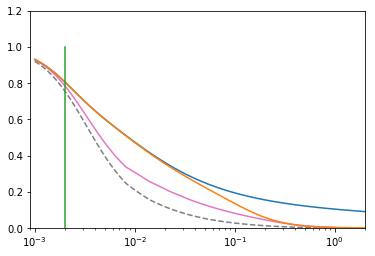

In [95]:
plt.figure()

plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_kh_ana[:, 125]/Cphi_kh_ana[:, 125], ls='-', color='C4');
# plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_z_kh[:, 125]/Cphi_z_kh[:, 125], ls='--', color='C5');

plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_kh_ana[:, 8]/Cphi_kh_ana[:, 8], ls='-', color='C6');
# plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_z_kh[:, 8]/Cphi_z_kh[:, 8], ls='--', color='C7');
plt.plot(kh00*1e3, ratio_gm00a)
plt.plot(kh00*1e3, ratio_gm00b)

plt.plot([1./500, 1./500], [0, 1])
plt.ylim([0, 1.2])
plt.xlim([9e-4, 2e0])

plt.figure()
plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_z_kh[:, 125]/Cphi_z_kh[:, 125], ls='--', color='C5');
plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_z_kh[:, 8]/Cphi_z_kh[:, 8], ls='--', color='C7');
plt.plot(kh00*1e3, ratio_gm00a)
plt.plot(kh00*1e3, ratio_gm00b)

plt.plot([1./500, 1./500], [0, 1])
plt.ylim([0, 1.2])
plt.xlim([9e-4, 2e0])

plt.figure()
plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_z_kh[:, 125]/Cphi_z_kh[:, 125], ls='--', color='C5');
plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_kh_ana[:, 125]/Cphi_kh_ana[:, 125], ls='-', color='C4');
plt.plot(kh00*1e3, ratio_gm00a)
plt.plot(kh00*1e3, ratio_gm00b)

plt.plot([1./500, 1./500], [0, 1])
plt.ylim([0, 1.2])
plt.xlim([9e-4, 2e0])

plt.figure()
plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_z_kh[:, 8]/Cphi_z_kh[:, 8], ls='--', color='C7');
plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_kh_ana[:, 8]/Cphi_kh_ana[:, 8], ls='-', color='C6');
plt.plot(kh00*1e3, ratio_gm00a)
plt.plot(kh00*1e3, ratio_gm00b)

plt.plot([1./500, 1./500], [0, 1])
plt.ylim([0, 1.2])
plt.xlim([9e-4, 2e0])

In [100]:
print(Cpsi_kh_ana.shape, Cpsi_z_kh.shape, kh.shape)

(500, 1000) (500, 1000) (500, 1)


In [103]:
for k in range(kh.size):
    ell = np.sqrt(kh[k:]**2 - kh[k]**2)  # these look like BCF eqs 2.24--25, but not quite...
    Cpsi_kh_ana[k] = np.trapz(Cpsi_kh_ana[k:] * ell, x=kh[k:], axis=0)  # actually these are BCF D^phi_W
    Cphi_kh_ana[k] = np.trapz(Cphi_kh_ana[k:] * ell, x=kh[k:], axis=0)  # and D^psi_W, not C^phi/psi_W
    Cpsi_z_kh[k] = np.trapz(Cpsi_z_kh[k:] * ell, x=kh[k:], axis=0)  # actually these are BCF D^phi_W
    Cphi_z_kh[k] = np.trapz(Cphi_z_kh[k:] * ell, x=kh[k:], axis=0)  # and D^psi_W, not C^phi/psi_W


In [105]:
kh00, ratio_gm00a = calc_gm_omega_star_v1(18., 10.3e-3, .804e3, Nd=None, dimscale=True, nummodes=10000)
kh00, ratio_gm00b = calc_gm_omega_star_v1(18., 10.3e-3, .804e3, Nd=None, dimscale=True, nummodes=50)

/home/smullersoares/anaconda3/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


/home/smullersoares/anaconda3/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/smullersoares/anaconda3/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/home/smullersoares/anaconda3/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/home/smullersoares/anaconda3/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


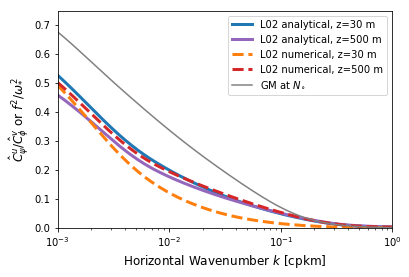

In [130]:
plt.figure()

plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_kh_ana[:, 8]/Cphi_kh_ana[:, 8], ls='-', color='C0', lw=3, label='L02 analytical, z=30 m');
plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_kh_ana[:, 125]/Cphi_kh_ana[:, 125], ls='-', color='C4', lw=3, label='L02 analytical, z=500 m');

plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_z_kh[:, 8]/Cphi_z_kh[:, 8], ls='--', color='C1', lw=3, label='L02 numerical, z=30 m');
plt.semilogx(kh[:, 0]*1e3/2/np.pi, Cpsi_z_kh[:, 125]/Cphi_z_kh[:, 125], ls='--', color='C3', lw=3, label='L02 numerical, z=500 m');

# plt.plot([1./500, 1./500], [0, 1])
plt.ylim([0, .75])
plt.xlim([.1e-2, 1e0])

# plt.plot(kh00*1e3, ratio_gm00a)
plt.plot(kh00*1e3, ratio_gm00b, color='grey', label=r'GM at $N_{\circ}$')
plt.xlabel(r'Horizontal Wavenumber $k$ [cpkm]', fontsize=12)
plt.legend(loc=0)
plt.ylabel(r"$\hat{C}^{u}_{\psi}/\hat{C}^{v}_{\phi}$ or $f^{2}/\omega_{*}^{2}$", fontsize=12)
plt.savefig("../analyses/figures/ratios_vert_struc_L02_ana_vs_num.pdf", bbox_inches='tight')

In [ ]:
upzi = 15
lozi = 2001

l02p_netp = {'latm':np.abs(latm_north), 'Nprof':Nobs_smo_north[upzi:lozi], 'z':-std_z[upzi:lozi],
             'Nd':Nobs_smo_north[upzi], 'zd':-std_z[upzi]}


## Equipartition statement

Using the picture of the WKB modes for the structure

$E$ = $\left(\frac{\omega^2 \left[A\left(\omega, z \right) + B\left(\omega, z \right) \right] + f^2 \left[A\left(\omega, z \right) - B\left(\omega, z \right) \right]}{\omega^2}\right) \hat{K}^{\phi}$

Near the surface approximately

$E \sim \left( 2 + 2\frac{f^2}{\omega^2}\right)\hat{K}^{\phi}$